# Import libraries and Data

In [270]:
# imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [271]:
#  Define current path and data path
current_path = os.path.dirname(os.path.abspath('__file__')) 
data_path = os.path.join(current_path, 'Data\diabetes_binary_health_indicators_BRFSS2015.csv')
# meta data: https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook
# import data into dataframe
diabetes_health_indicators_data = pd.read_csv(data_path)

# Helper Functions

## General

In [272]:
def separate_column_names_by_binary_and_nonbinary(df):
    """
    This function returns binary column name and non-binary column name based on describe method's min and max value.
    """
    binary_column_names = []
    nonbinary_column_names = []
    for column_name in df.columns:
        if df[column_name].describe().loc['min'] == 0 and df[column_name].describe().loc['max'] == 1:
            binary_column_names.append(column_name)
        else:
            nonbinary_column_names.append(column_name)
    return binary_column_names, nonbinary_column_names

## Plotting

In [273]:
def create_stacked_count_plot_for_categorical_variables(df, column_name, grouped_variable, title):
    """
    This function creates a stacked count plot for categorical variables.
    """
    color = ['blue', 'red']
    df.groupby([column_name, grouped_variable]).size().unstack().sort_values(by=column_name, ascending=True).plot(kind='bar', stacked=True, color=color, figsize=(10, 10))
    plt.title(title)
    plt.show()

In [274]:
def create_count_plot_for_categorical_variables(df, column_name, title):
    """
    This function creates count plot for categorical variables.
    """
    plt.figure(figsize=(10, 10))
    sns.countplot(x=column_name, data=df, order=df[column_name].value_counts().index)
    plt.title(title)
    plt.show()

In [275]:
def create_pi_chart_for_categorical_variables(df, column_name, title):
    """
    This function creates pi chart for categorical variables.
    """
    plt.figure(figsize=(10, 10))
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(title)
    plt.show()

In [276]:
def create_heat_map(df, title):
    """
    This function creates heat map for categorical variables.
    """
    plt.figure(figsize=(10, 10))
    sns.heatmap(df.corr(), annot=True)
    plt.title(title)
    plt.show()

In [277]:
def create_histogram(df, column_name, title, bins):
    """
    This function creates histogram for continuous variables.
    """
    plt.figure(figsize=(10, 10))
    sns.distplot(df[column_name], kde=True, bins=bins)
    plt.title(title)
    plt.show()

In [278]:
def create_ordered_heat_map_for_categorical_variables (df, column_name, target_variable, title, specify = None):
    """
    This function creates a ordered heat map for a categorical variable.
    """
    plt.figure(figsize=(8, 8))
    # if target variable does not have specify value, raise an error
    if specify != None and specify not in df[target_variable].unique():
        raise ValueError('Specify value is not in target variable')
    if specify != None:
        plt.figure(figsize=(4, 8)) 
        df = df[df[target_variable] == specify]
        #  Max verticle figsize is 8 :/
        # if df[target_variable].unique() >= 10:
        #     plt.figure(figsize=(4, 15))
    
    # plot the heatmap
    sns.heatmap(df.groupby([column_name, target_variable]).size().unstack(), 
                annot=True, fmt="d", cmap="YlGnBu")
    plt.title(title)
    plt.show()

In [279]:
def create_box_plot_for_numeric_variables(data, target_variable, numeric_variable, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_variable, y=numeric_variable, data=data)
    plt.title(title)
    plt.show()

# Exploratory Data Analysis (EDA)

## View Data

In [280]:
# view data
print("Data Preview")
display(diabetes_health_indicators_data.iloc[:,0:20].head())
display(diabetes_health_indicators_data.iloc[:,20:].head())
# check for column names
print("\nColumn Preview")
display(diabetes_health_indicators_data.columns.to_frame().reset_index(drop=True).rename(columns={0:'column_name'}))

Data Preview


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


,Education,Income
0,4.0,3.0
1,6.0,1.0
2,4.0,8.0
3,3.0,6.0
4,5.0,4.0



Column Preview


,column_name
0,Diabetes_binary
1,HighBP
2,HighChol
3,CholCheck
4,BMI
5,Smoker
6,Stroke
7,HeartDiseaseorAttack
8,PhysActivity
9,Fruits


## Check for Missing Values

In [281]:
# check for missing values
print("\nMissing Values")
display(diabetes_health_indicators_data.isnull().sum().to_frame().reset_index(drop=False).rename(columns={'index':'column_name', 0:'missing_values'}))


Missing Values


,column_name,missing_values
0,Diabetes_binary,0
1,HighBP,0
2,HighChol,0
3,CholCheck,0
4,BMI,0
5,Smoker,0
6,Stroke,0
7,HeartDiseaseorAttack,0
8,PhysActivity,0
9,Fruits,0


## Column Specific Statistics

In [282]:
#binary variables filter
diabetes_health_indicators_data_binary_columns, diabetes_health_indicators_data_non_binary_columns = separate_column_names_by_binary_and_nonbinary(diabetes_health_indicators_data)
print("\nBinary Columns")
display(diabetes_health_indicators_data_binary_columns)
print('number of binary columns: ', len(diabetes_health_indicators_data_binary_columns))
print("\nNon-Binary Columns")
display(diabetes_health_indicators_data_non_binary_columns)
print('number of non-binary columns: ', len(diabetes_health_indicators_data_non_binary_columns))


Binary Columns


['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

number of binary columns:  15

Non-Binary Columns


['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

number of non-binary columns:  7


In [283]:
# check if data is ordinal or nominal
print("\nNumerical Ordinal Columns Check")
display(diabetes_health_indicators_data[diabetes_health_indicators_data_non_binary_columns].describe())
display(diabetes_health_indicators_data[diabetes_health_indicators_data_non_binary_columns].astype('object').describe().loc[['count', 'unique']])
# conclusion: GenHlth, Age, Education, Income are ordinal variables
diabetes_health_indicators_data_ordinal_columns = ['GenHlth', 'Age', 'Education', 'Income']
diabetes_health_indicators_data_numeric_columns = [column_name for column_name in diabetes_health_indicators_data_non_binary_columns if column_name not in diabetes_health_indicators_data_ordinal_columns]
print("\nNumerical Columns")
display(diabetes_health_indicators_data_numeric_columns)
print('number of numerical columns: ', len(diabetes_health_indicators_data_numeric_columns))
print("\nOrdinal Columns")
display(diabetes_health_indicators_data_ordinal_columns)
print('number of ordinal columns: ', len(diabetes_health_indicators_data_ordinal_columns))


Numerical Ordinal Columns Check


,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
unique,84.0,5.0,31.0,31.0,13.0,6.0,8.0



Numerical Columns


['BMI', 'MentHlth', 'PhysHlth']

number of numerical columns:  3

Ordinal Columns


['GenHlth', 'Age', 'Education', 'Income']

number of ordinal columns:  4


In [284]:
#  summary of data
print("Summary of data")
print("Summary of data for numeric columns")
display(diabetes_health_indicators_data[diabetes_health_indicators_data_numeric_columns].describe())
print('Summary of data for ordinal columns')
display(diabetes_health_indicators_data[diabetes_health_indicators_data_ordinal_columns].astype('object').describe())
print("Summary of data for binary columns")
# change binary columns to object type
diabetes_health_indicators_data_object_type = diabetes_health_indicators_data[diabetes_health_indicators_data_binary_columns].astype('object')
display(diabetes_health_indicators_data_object_type.describe())

Summary of data
Summary of data for numeric columns


,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


Summary of data for ordinal columns


,GenHlth,Age,Education,Income
count,253680.0,253680.0,253680.0,253680.0
unique,5.0,13.0,6.0,8.0
top,2.0,9.0,6.0,8.0
freq,89084.0,33244.0,107325.0,90385.0


Summary of data for binary columns


,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
freq,218334.0,144851.0,146089.0,244210.0,141257.0,243388.0,229787.0,191920.0,160898.0,205841.0,239424.0,241263.0,232326.0,211005.0,141974.0


## Variable Importance

#### Import Libraries

In [285]:
# feature significance test libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
# Kruskal-Wallis Test
from scipy.stats import kruskal

### Binary Categorical Variables - Chi-Square Test

#### Chi-Square Test Code

In [286]:
#  chi2 test on binary columns
chi2_test = SelectKBest(score_func=chi2, k='all')
chi2_test.fit(diabetes_health_indicators_data[diabetes_health_indicators_data_binary_columns].drop('Diabetes_binary', axis=1), diabetes_health_indicators_data['Diabetes_binary'])


SelectKBest(k='all', score_func=<function chi2 at 0x0000016FEA00F430>)

#### Chi-Square Test Results

In [287]:
# create dataframe for chi2 test scores
chi2_test_scores = pd.DataFrame(chi2_test.scores_, columns=['chi2_score'])
chi2_test_scores['column_name'] = diabetes_health_indicators_data_binary_columns[1:]
# swap column names and chi2 scores
chi2_test_scores = chi2_test_scores[['column_name', 'chi2_score']]
chi2_test_scores = chi2_test_scores.sort_values(by='chi2_score', ascending=False).reset_index(drop=True)
print("Chi2 Test Scores")
display(chi2_test_scores)

#  create dataframe for chi2 test p-values
chi2_test_p_values = pd.DataFrame(chi2_test.pvalues_, columns=['chi2_p_value'])
chi2_test_p_values['column_name'] = diabetes_health_indicators_data_binary_columns[1:]
# swap column names and chi2 scores
chi2_test_p_values = chi2_test_p_values[['column_name', 'chi2_p_value']]
chi2_test_p_values = chi2_test_p_values.sort_values(by='chi2_p_value', ascending=True).reset_index(drop=True)
print("Chi2 Test P-Values")
display(chi2_test_p_values)

Chi2 Test Scores


,column_name,chi2_score
0,DiffWalk,10059.506391
1,HighBP,10029.013935
2,HeartDiseaseorAttack,7221.975378
3,HighChol,5859.710582
4,Stroke,2725.225194
5,PhysActivity,861.887532
6,HvyAlcoholConsump,779.424807
7,Smoker,521.978858
8,NoDocbcCost,229.542412
9,Fruits,154.291404


Chi2 Test P-Values


,column_name,chi2_p_value
0,HighBP,0.000000e+00
1,HighChol,0.000000e+00
2,Stroke,0.000000e+00
3,HeartDiseaseorAttack,0.000000e+00
4,DiffWalk,0.000000e+00
5,PhysActivity,1.893271e-189
6,HvyAlcoholConsump,1.605281e-171
7,Smoker,1.570423e-115
8,NoDocbcCost,7.501278e-52
9,Fruits,2.000073e-35


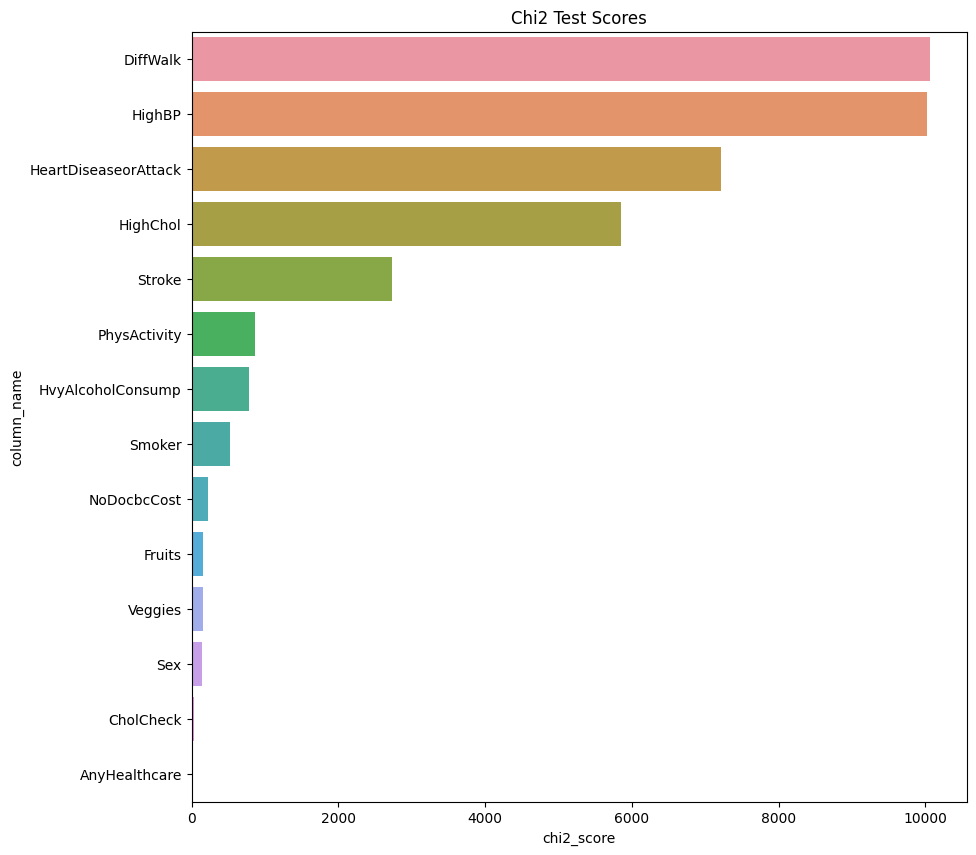

In [288]:
# plot chi2 test scores
plt.figure(figsize=(10,10))
sns.barplot(x='chi2_score', y='column_name', data=chi2_test_scores)
plt.title('Chi2 Test Scores')
plt.show()

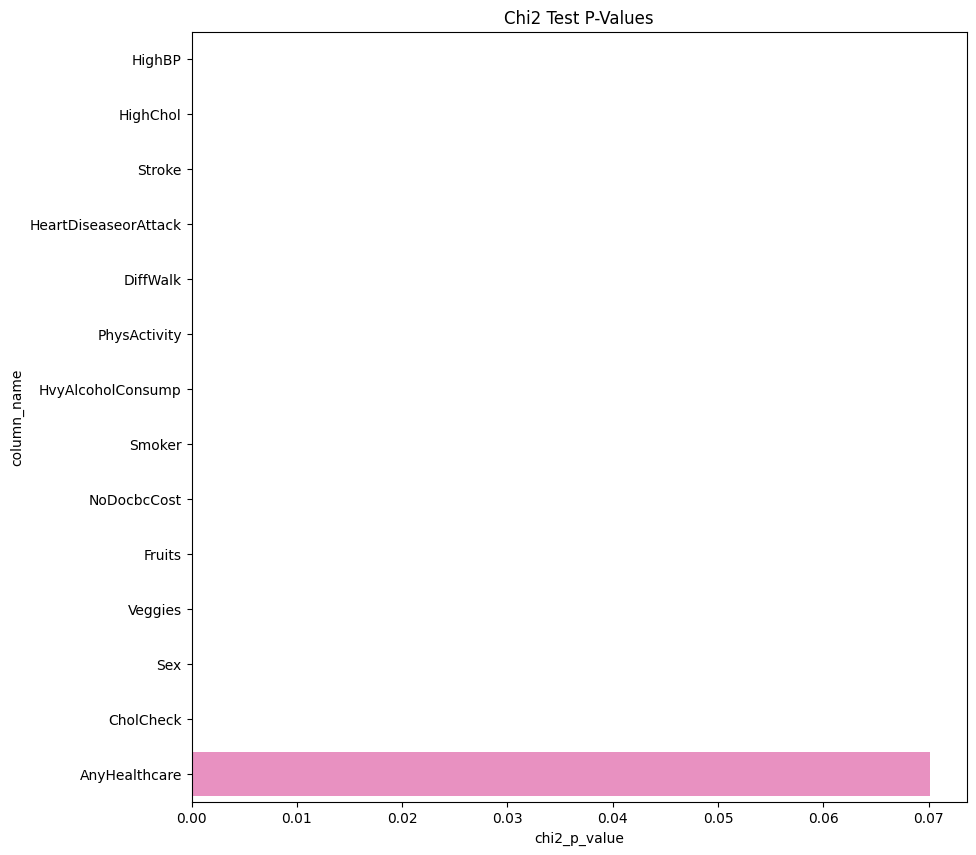

In [289]:
#  plot chi2 test p-values
plt.figure(figsize=(10,10))
sns.barplot(x='chi2_p_value', y='column_name', data=chi2_test_p_values)
plt.title('Chi2 Test P-Values')
plt.show()

#### Record Categorical Variables with Low P-Values in the Chi-Square Test

In [290]:
# record chi2 test p-values more than 0.05 into a list
chi2_test_p_values_more_than_0_05 = chi2_test_p_values[chi2_test_p_values['chi2_p_value'] > 0.05]['column_name'].to_list()
chi2_test_p_values_more_than_0_05

['AnyHealthcare']

### Ordinal Categorical Variables - Kruskal-Wallis Test

#### Kruskal-Wallis Test Code

In [291]:
# create dataframe for Kruskal-Wallis Test scores
kruskal_test_scores = pd.DataFrame(columns=['column_name', 'kruskal_score', 'kruskal_p_value'])
kruskal_test_scores['column_name'] = diabetes_health_indicators_data_ordinal_columns
for column_name in diabetes_health_indicators_data_ordinal_columns:
    ordinal_negative_data = diabetes_health_indicators_data[diabetes_health_indicators_data['Diabetes_binary'] == 0][column_name]
    ordinal_positive_data = diabetes_health_indicators_data[diabetes_health_indicators_data['Diabetes_binary'] == 1][column_name]
    kruskal_test_scores_individual =  kruskal(ordinal_negative_data,ordinal_positive_data)
    kruskal_test_scores.loc[kruskal_test_scores['column_name'] == column_name, 'kruskal_score'] = kruskal_test_scores_individual[0]
    kruskal_test_scores.loc[kruskal_test_scores['column_name'] == column_name, 'kruskal_p_value'] = kruskal_test_scores_individual[1]

#### Kruskal-Wallis Test Results

In [292]:
print("Kruskal-Wallis Test Scores")
display(kruskal_test_scores[['column_name', 'kruskal_score']])

print("Kruskal-Wallis Test P-Values")
display(kruskal_test_scores[['column_name', 'kruskal_p_value']])

Kruskal-Wallis Test Scores


,column_name,kruskal_score
0,GenHlth,20996.936084
1,Age,8009.07663
2,Education,3655.275444
3,Income,6765.218846


Kruskal-Wallis Test P-Values


,column_name,kruskal_p_value
0,GenHlth,0.0
1,Age,0.0
2,Education,0.0
3,Income,0.0


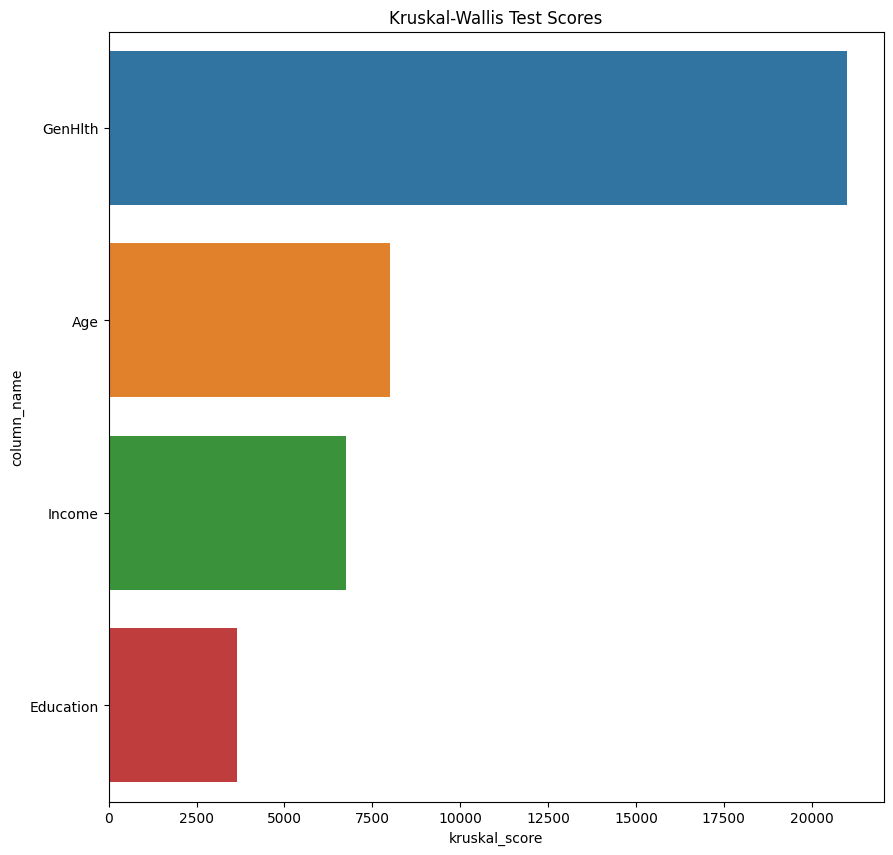

In [293]:
# plot kruskal test scores
plt.figure(figsize=(10,10))
sns.barplot(x='kruskal_score', y='column_name', data=kruskal_test_scores.sort_values(by='kruskal_score', ascending=False))
plt.title('Kruskal-Wallis Test Scores')
plt.show()

#### All Ordinal Categorical Variables are Significant p-values < 0.05
- Thus, all ordinal categorical columns are chosen for the model

### Numerical Variables - ANOVA Test

#### ANOVA Test Code

In [294]:
#  f_classif test on numerical columns
f_classif_test = SelectKBest(score_func=f_classif, k='all')
f_classif_test.fit(diabetes_health_indicators_data[diabetes_health_indicators_data_numeric_columns], diabetes_health_indicators_data['Diabetes_binary'])

SelectKBest(k='all')

#### ANOVA Test Results

In [295]:
# create dataframe for f_classif test scores
f_classif_test_scores = pd.DataFrame(f_classif_test.scores_, columns=['f_classif_score'])
f_classif_test_scores['column_name'] = diabetes_health_indicators_data_numeric_columns
# swap column names and chi2 scores
f_classif_test_scores = f_classif_test_scores[['column_name', 'f_classif_score']]
f_classif_test_scores = f_classif_test_scores.sort_values(by='f_classif_score', ascending=False).reset_index(drop=True)
print("F_Classif Test Scores")
display(f_classif_test_scores)

#  create dataframe for f_classif test p-values
f_classif_test_p_values = pd.DataFrame(f_classif_test.pvalues_, columns=['f_classif_p_value'])
f_classif_test_p_values['column_name'] = diabetes_health_indicators_data_numeric_columns
# swap column names and chi2 scores
f_classif_test_p_values = f_classif_test_p_values[['column_name', 'f_classif_p_value']]
f_classif_test_p_values = f_classif_test_p_values.sort_values(by='f_classif_p_value', ascending=True).reset_index(drop=True)
print("F_Classif Test P-Values")
display(f_classif_test_p_values)

F_Classif Test Scores


,column_name,f_classif_score
0,BMI,12516.718642
1,PhysHlth,7672.267690
2,MentHlth,1224.700591


F_Classif Test P-Values


,column_name,f_classif_p_value
0,BMI,0.000000e+00
1,PhysHlth,0.000000e+00
2,MentHlth,1.143283e-267


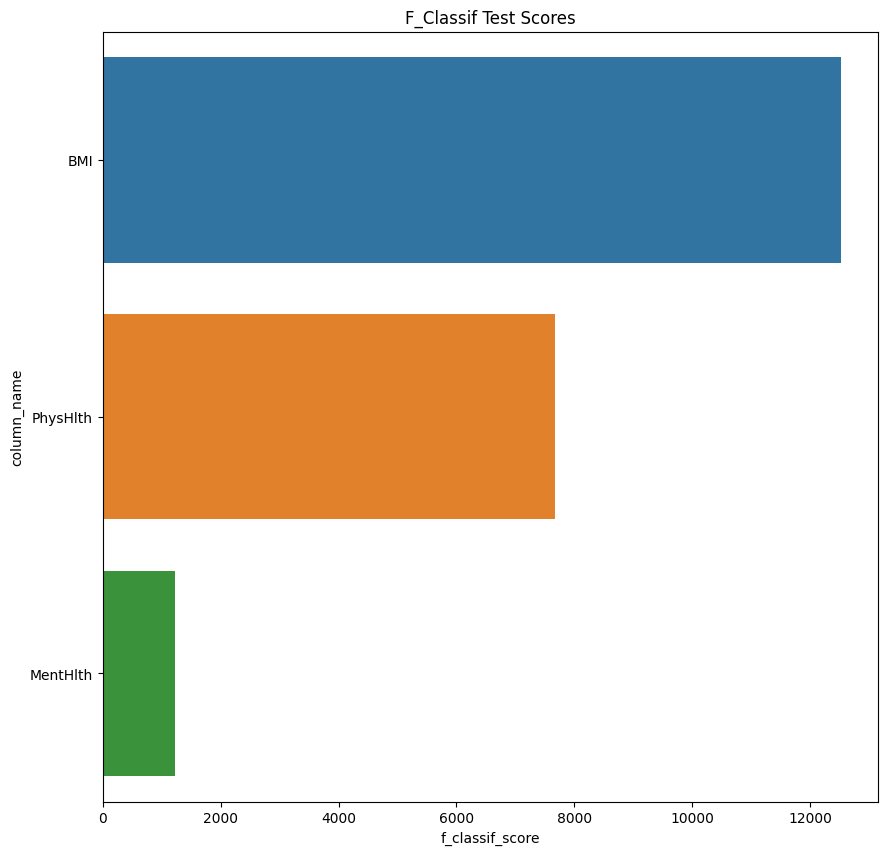

In [296]:
# plot f_classif test scores
plt.figure(figsize=(10,10))
sns.barplot(x='f_classif_score', y='column_name', data=f_classif_test_scores)
plt.title('F_Classif Test Scores')
plt.show()

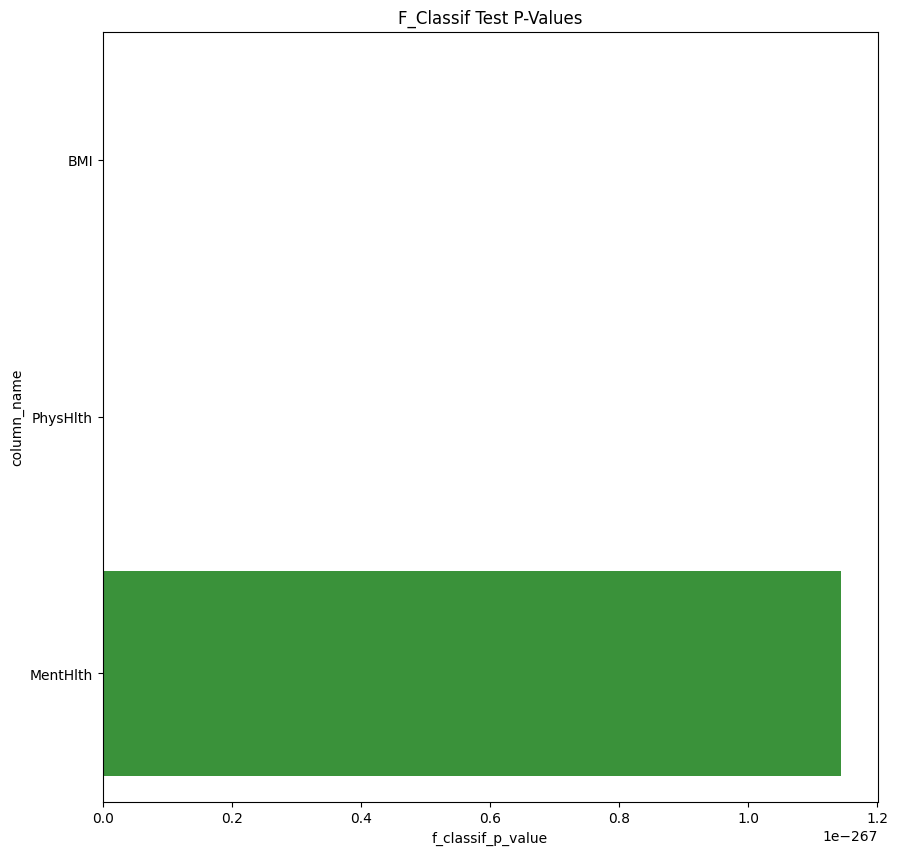

In [297]:
#  plot f_classif test p-values
plt.figure(figsize=(10,10))
sns.barplot(x='f_classif_p_value', y='column_name', data=f_classif_test_p_values)
plt.title('F_Classif Test P-Values')
plt.show()

#### All Nemerical Variables are Significant p-values < 0.05
- Thus, all numeric columns are chosen for the model

### Filter Data out insignificant columns

In [298]:
#  drop columns that are not significant
diabetes_health_indicators_data_after_feature_selection = diabetes_health_indicators_data.drop(chi2_test_p_values_more_than_0_05, axis=1)
diabetes_health_indicators_data_after_feature_selection.shape

(253680, 21)

## EDA on Specific Columns After Filtering

### Categorical Variables

#### Binary Categorical Variables

##### HeatMap of Categorical Variables and Binary Target Variable

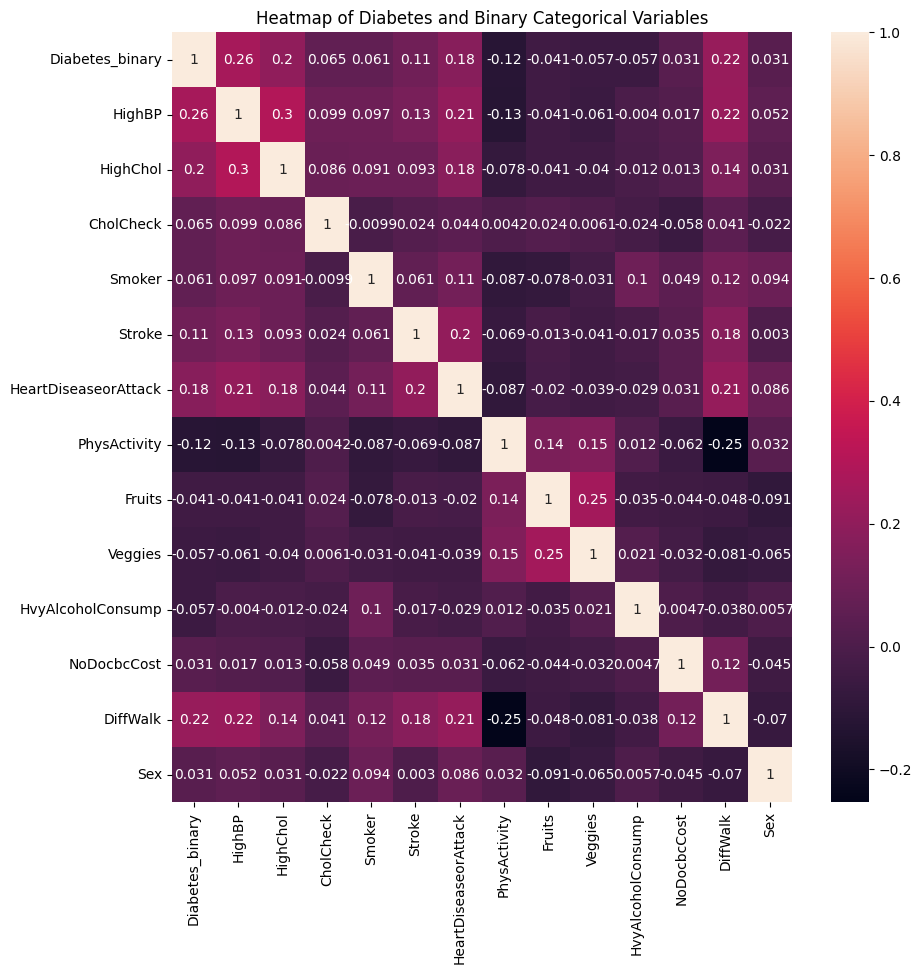

In [299]:
#  remove insignificant columns from categorical variables list
categorical_variables_after_filtering = diabetes_health_indicators_data_binary_columns.copy()
# p/s TIL that you can't combine commands to remove items from a list ._.
# (most likely because .remove is a method or something)
categorical_variables_after_filtering.remove('AnyHealthcare')
create_heat_map(diabetes_health_indicators_data_after_feature_selection[categorical_variables_after_filtering],
                'Heatmap of Diabetes and Binary Categorical Variables')

##### Target Variable - Diabetes_binary

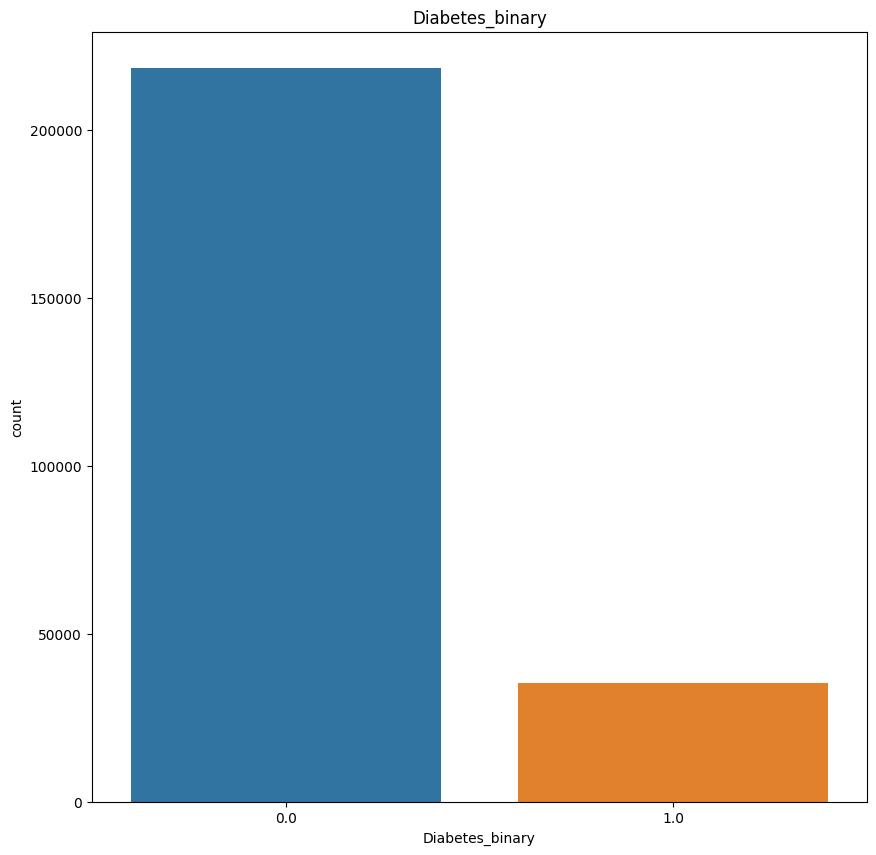

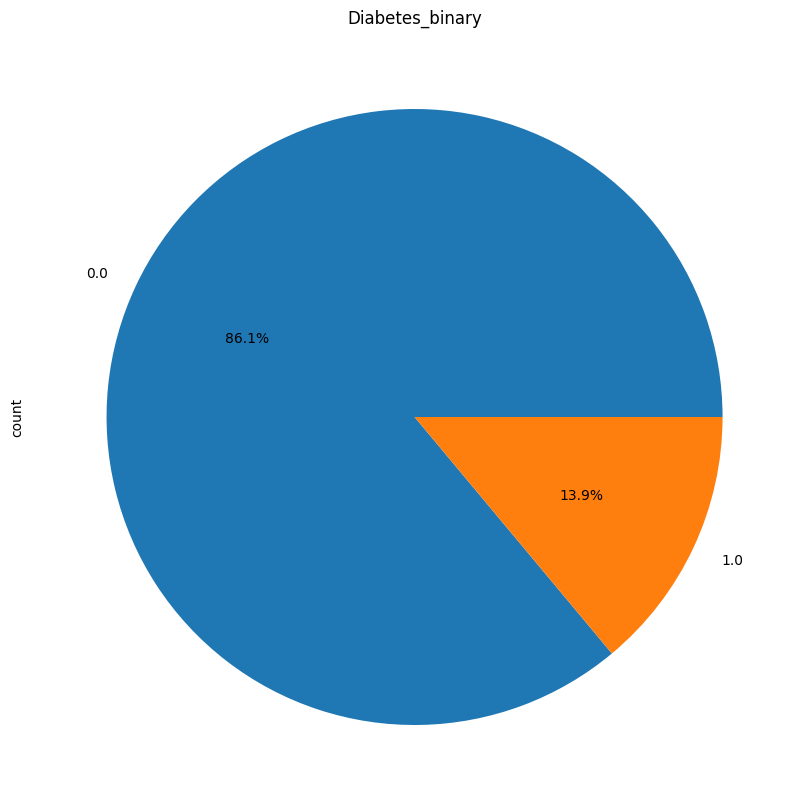

In [300]:
# plot a count plot and a pi chart for diabetes_binary
create_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Diabetes_binary', 'Diabetes_binary')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Diabetes_binary', 'Diabetes_binary')

##### Variable 1 - HighBP

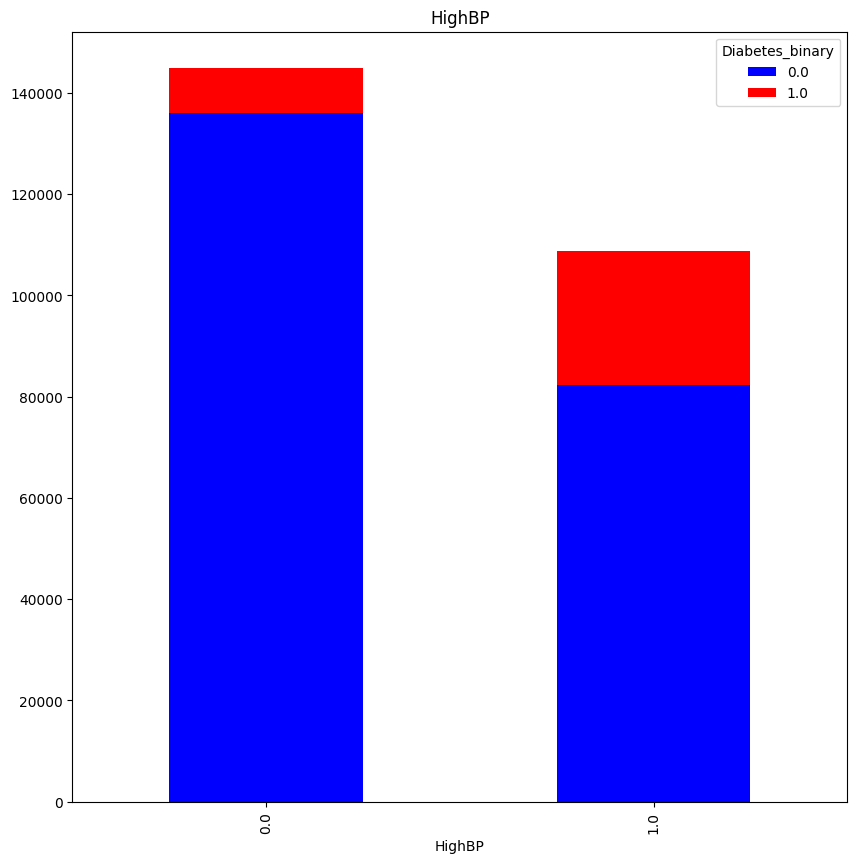

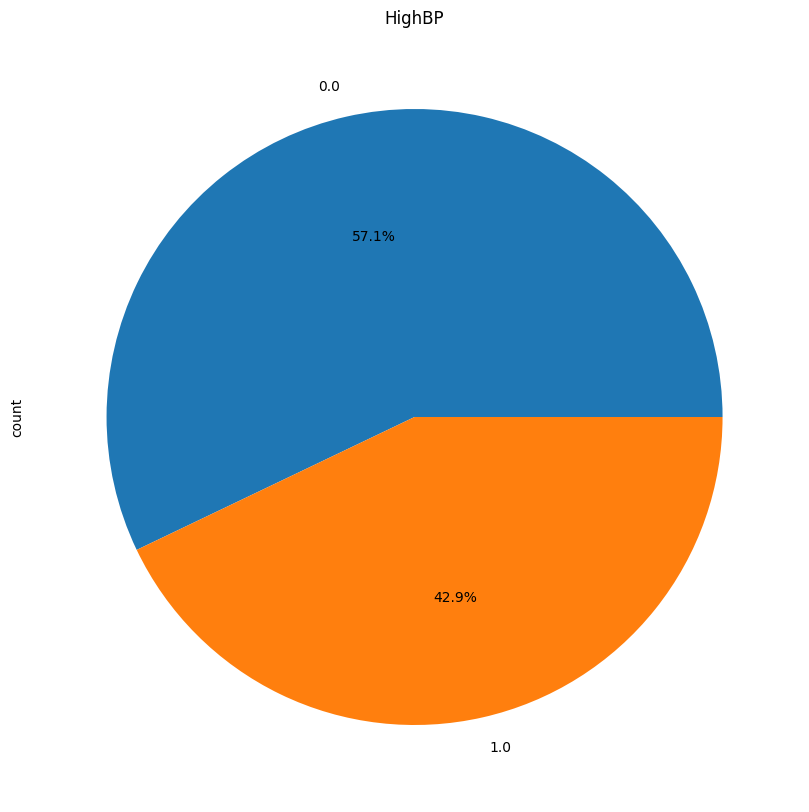

<Figure size 800x800 with 0 Axes>

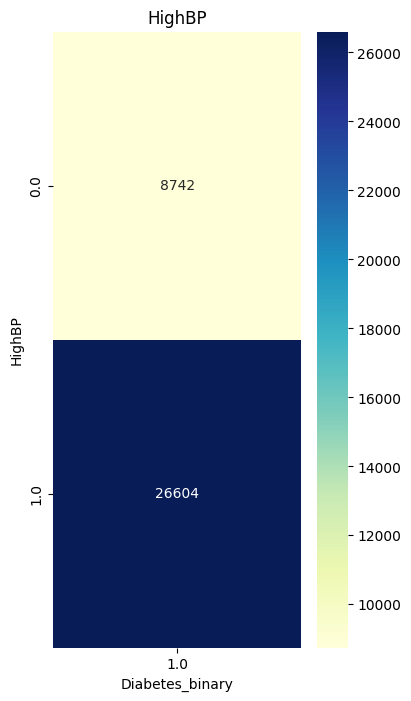

In [301]:
# plot a stacked count plot and a pi chart for HighBP
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighBP' , 'Diabetes_binary', 'HighBP')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighBP', 'HighBP')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighBP', 'Diabetes_binary', 'HighBP', 1)

##### Variable 2 - HighChol

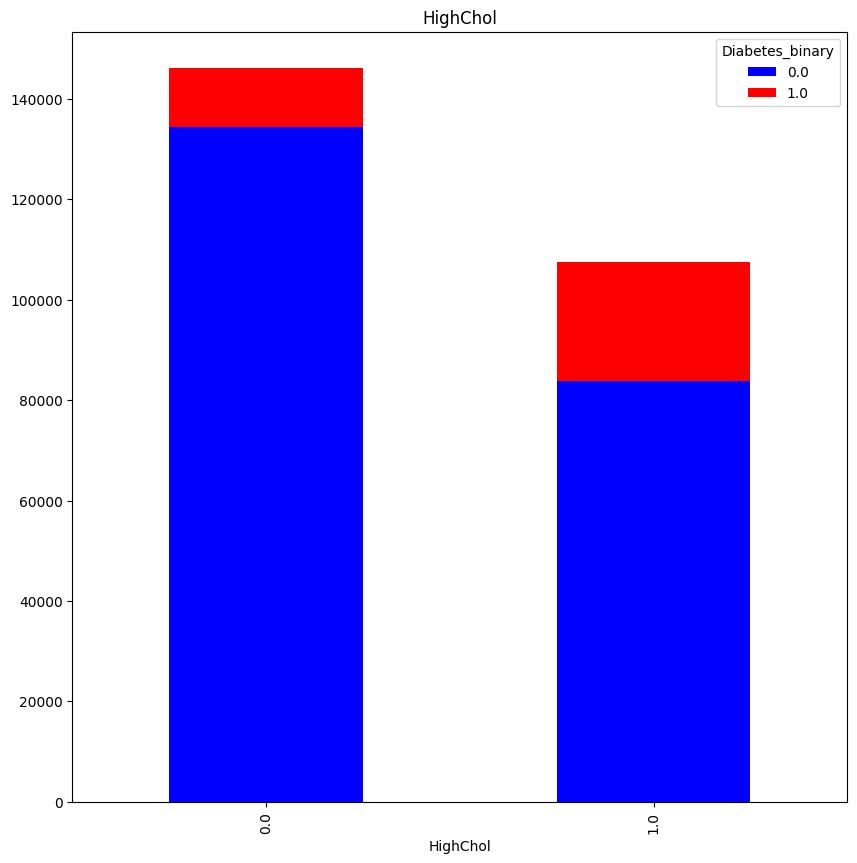

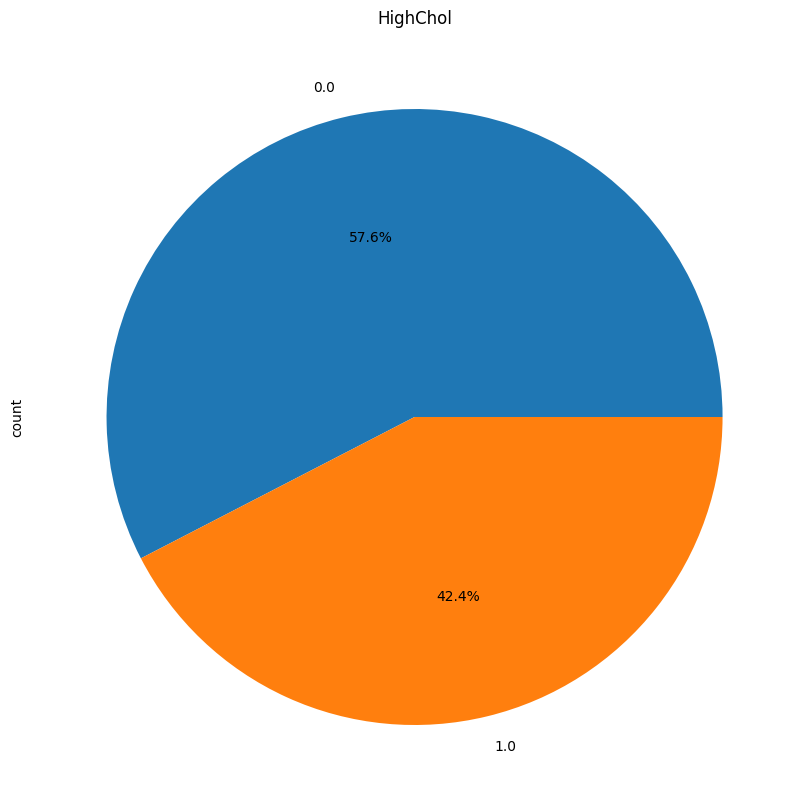

<Figure size 800x800 with 0 Axes>

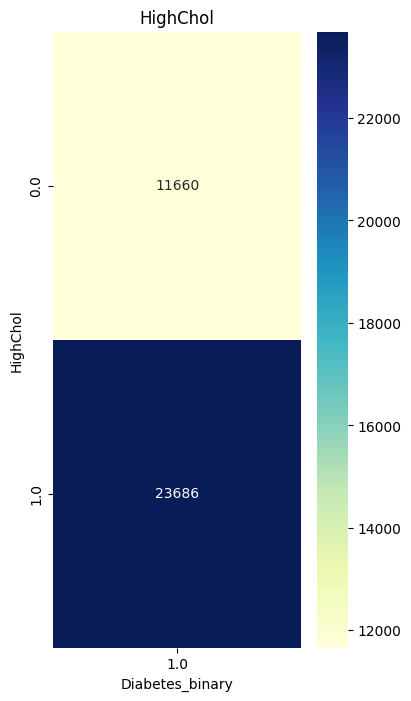

In [302]:
# plot a stacked count plot and a pi chart for HighChol
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighChol' , 'Diabetes_binary', 'HighChol')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighChol', 'HighChol')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HighChol', 'Diabetes_binary', 'HighChol', 1)

##### Variable 3 - CholCheck

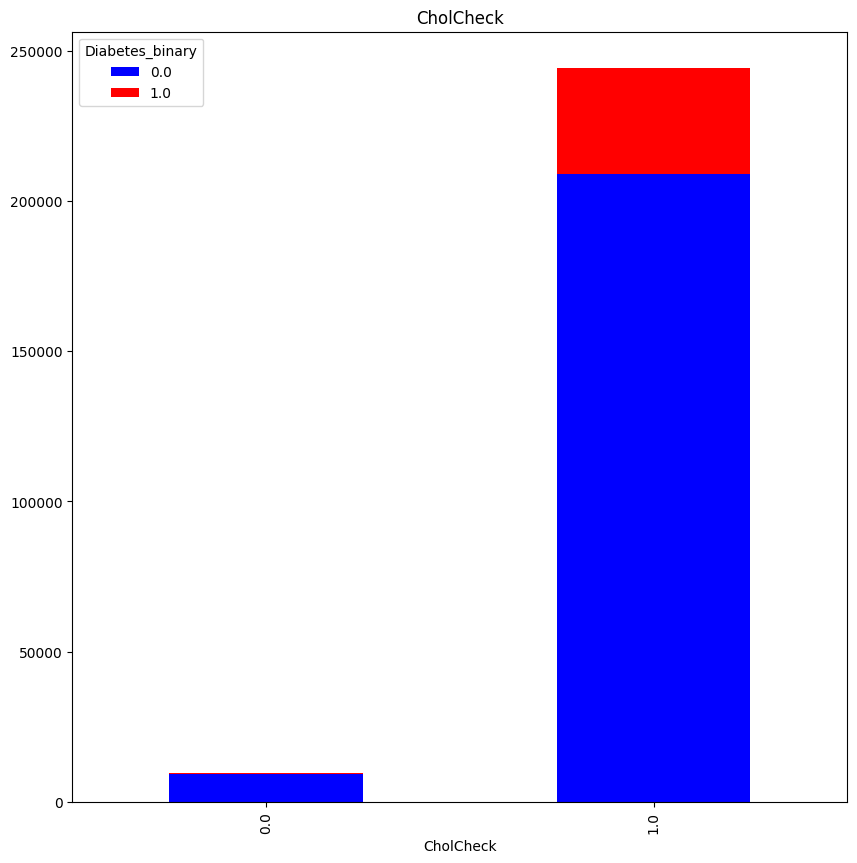

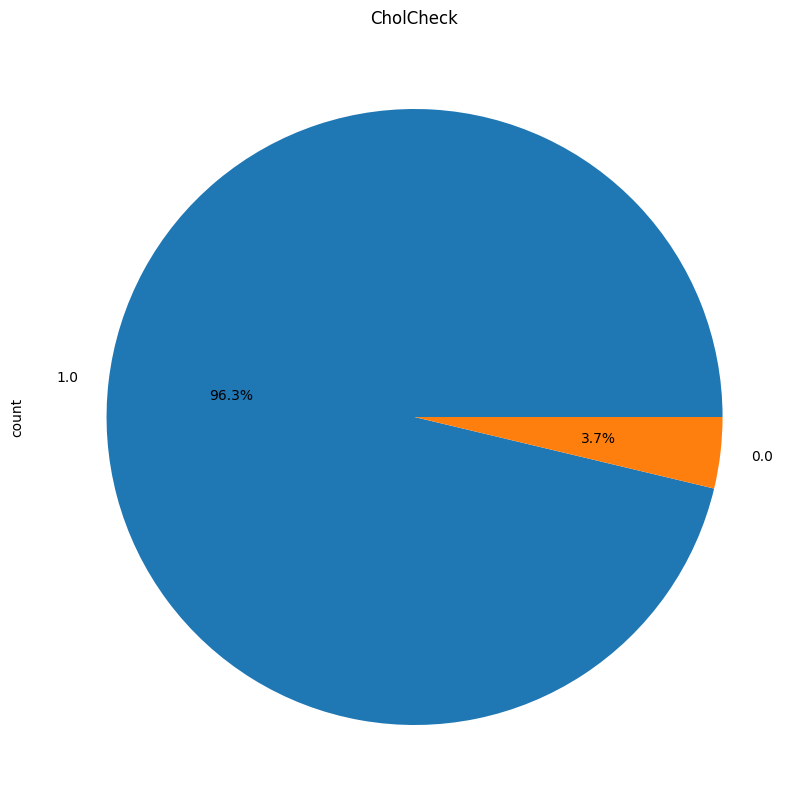

<Figure size 800x800 with 0 Axes>

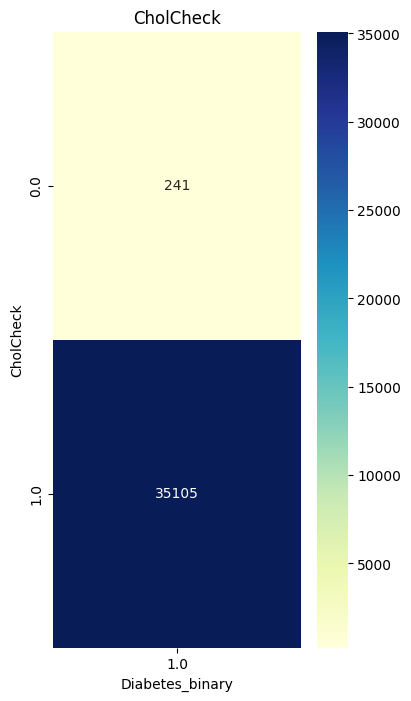

In [303]:
# plot a stacked count plot and a pi chart for CholCheck
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'CholCheck' , 'Diabetes_binary', 'CholCheck')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'CholCheck', 'CholCheck')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'CholCheck', 'Diabetes_binary', 'CholCheck', 1)

##### Variable 4 - Smoker

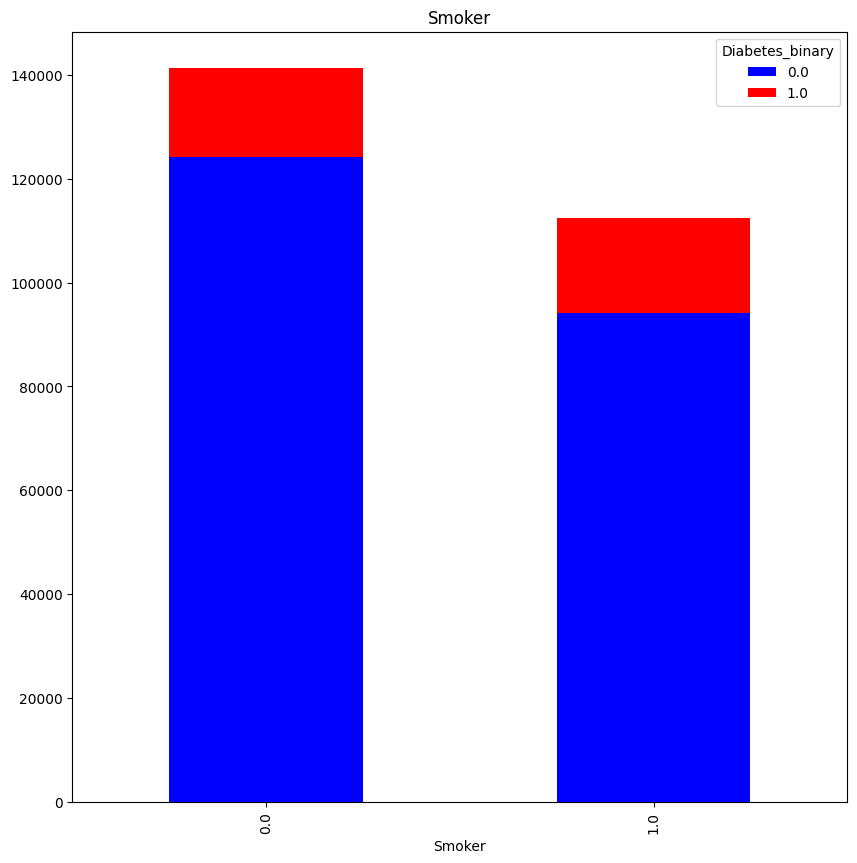

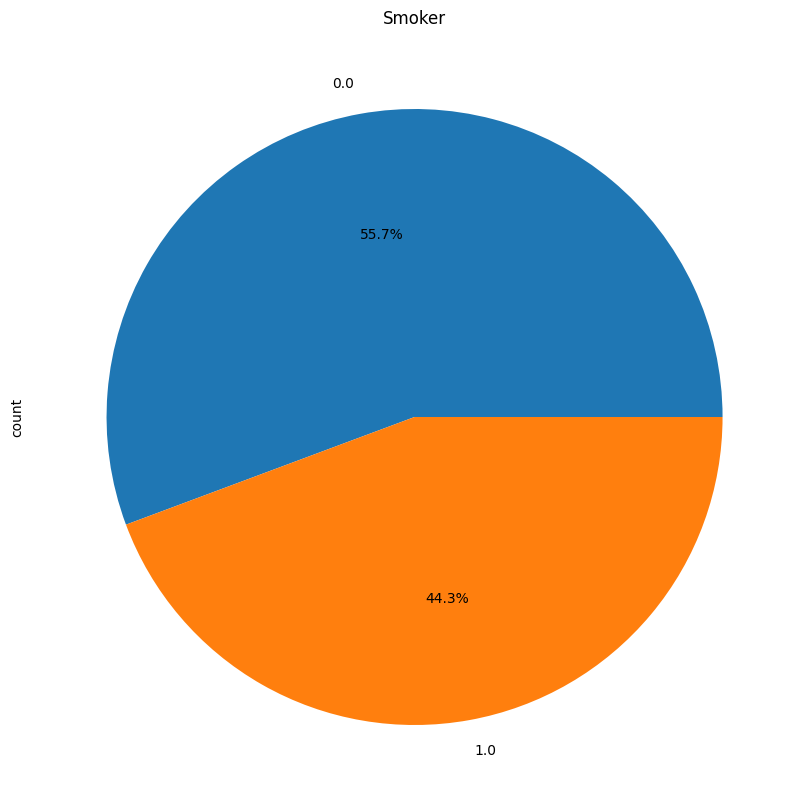

<Figure size 800x800 with 0 Axes>

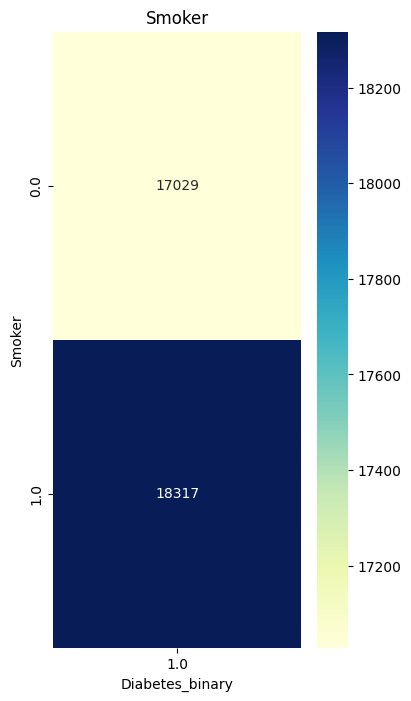

In [304]:
# plot a stacked count plot and a pi chart for Smoker
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Smoker' , 'Diabetes_binary', 'Smoker')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Smoker', 'Smoker')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Smoker', 'Diabetes_binary', 'Smoker', 1)

##### Variable 5 - Stroke

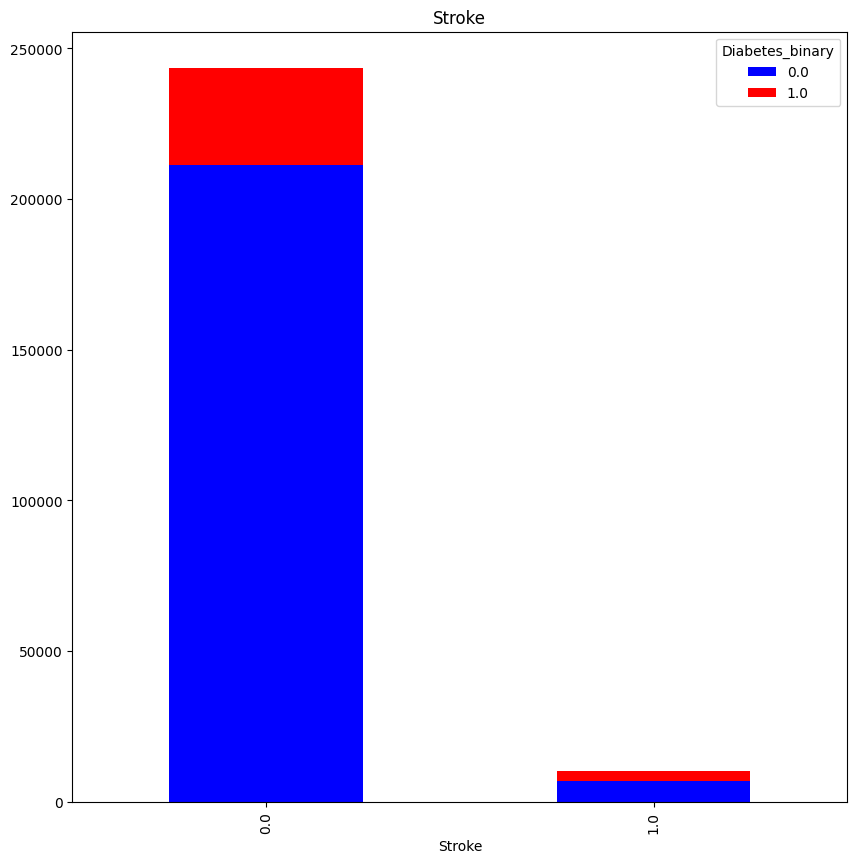

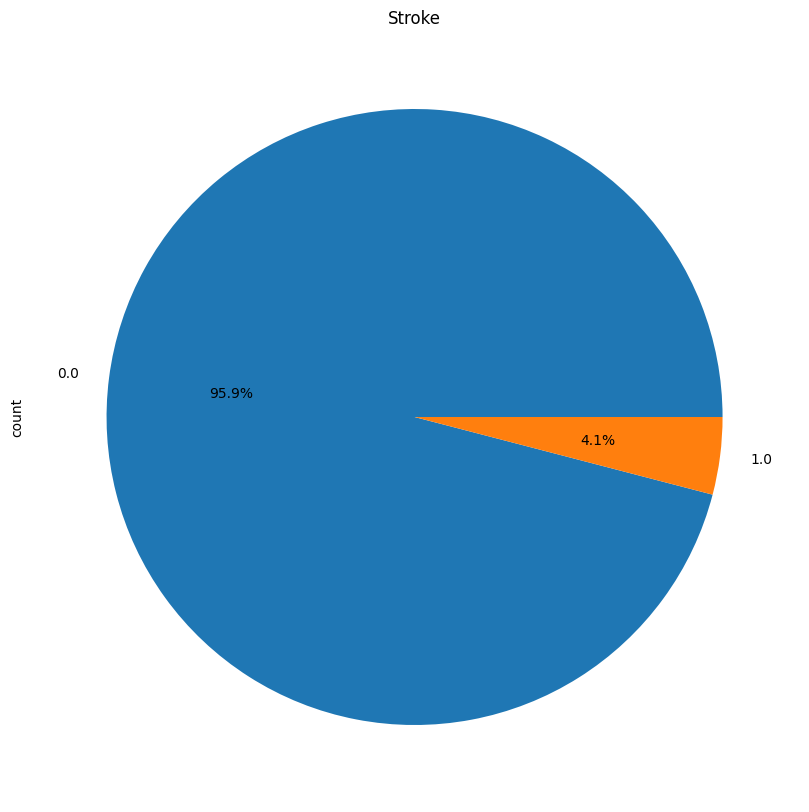

<Figure size 800x800 with 0 Axes>

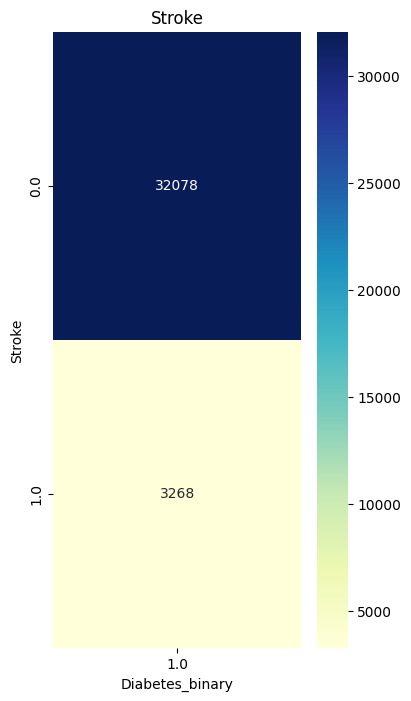

In [305]:
# plot a stacked count plot and a pi chart for Stroke
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Stroke' , 'Diabetes_binary', 'Stroke')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Stroke', 'Stroke')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Stroke', 'Diabetes_binary', 'Stroke', 1)

##### Variable 6 - HeartDiseaseorAttack

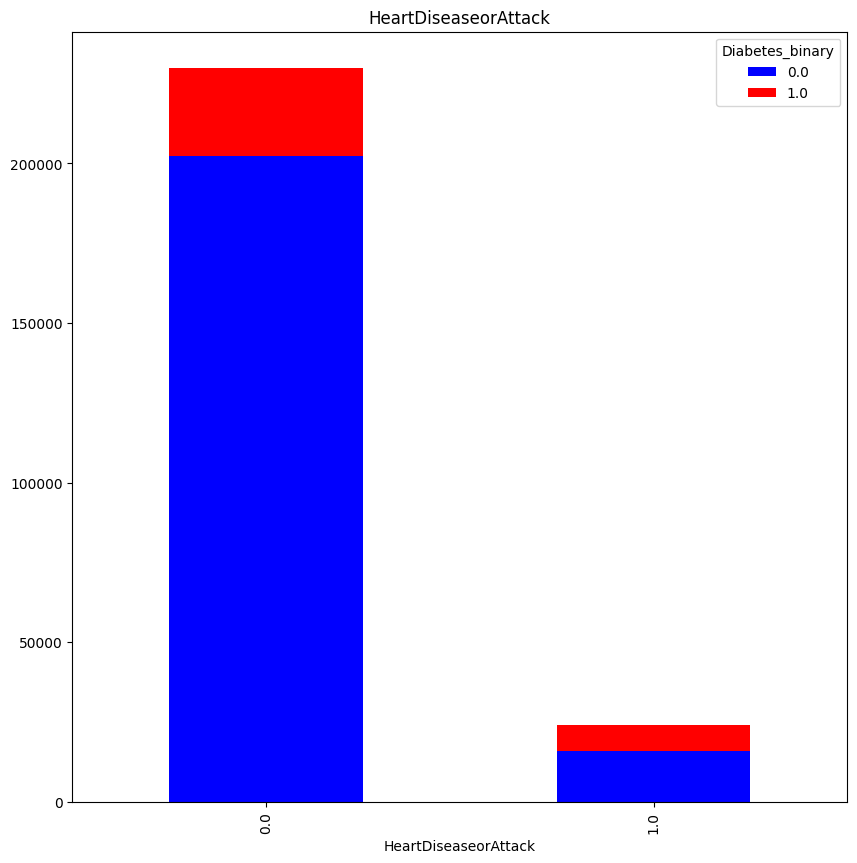

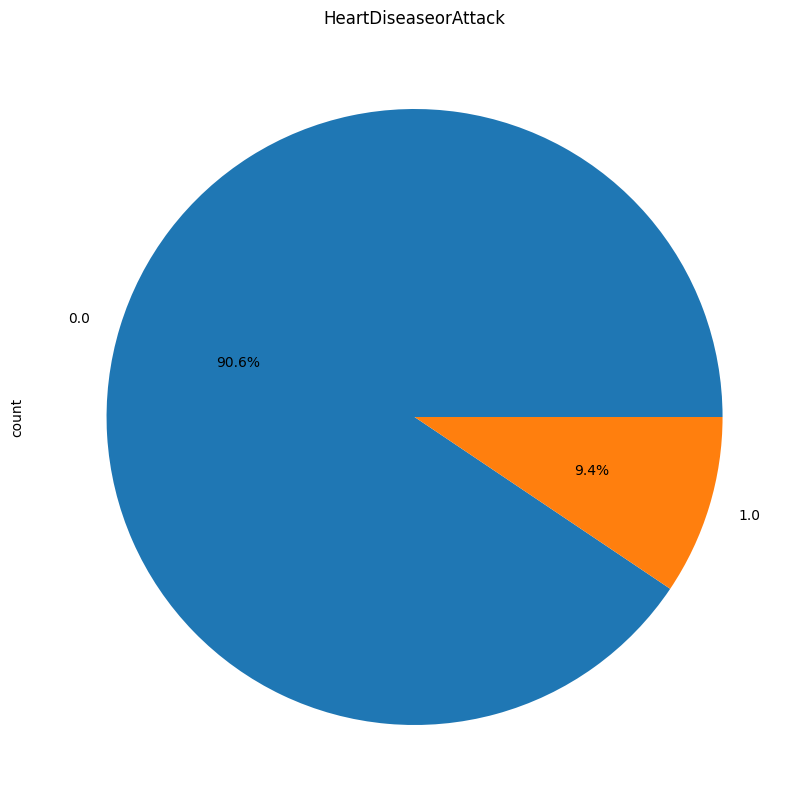

<Figure size 800x800 with 0 Axes>

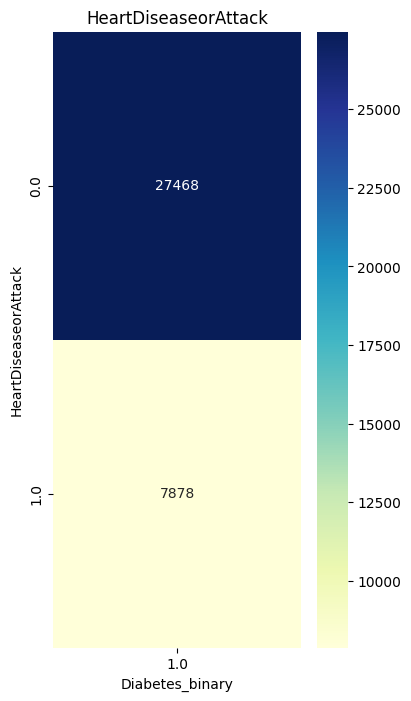

In [306]:
# plot a stacked count plot and a pi chart for HeartDiseaseorAttack
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HeartDiseaseorAttack' , 'Diabetes_binary', 'HeartDiseaseorAttack')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HeartDiseaseorAttack', 'HeartDiseaseorAttack')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HeartDiseaseorAttack', 'Diabetes_binary', 'HeartDiseaseorAttack', 1)

##### Variable 7 - PhysActivity

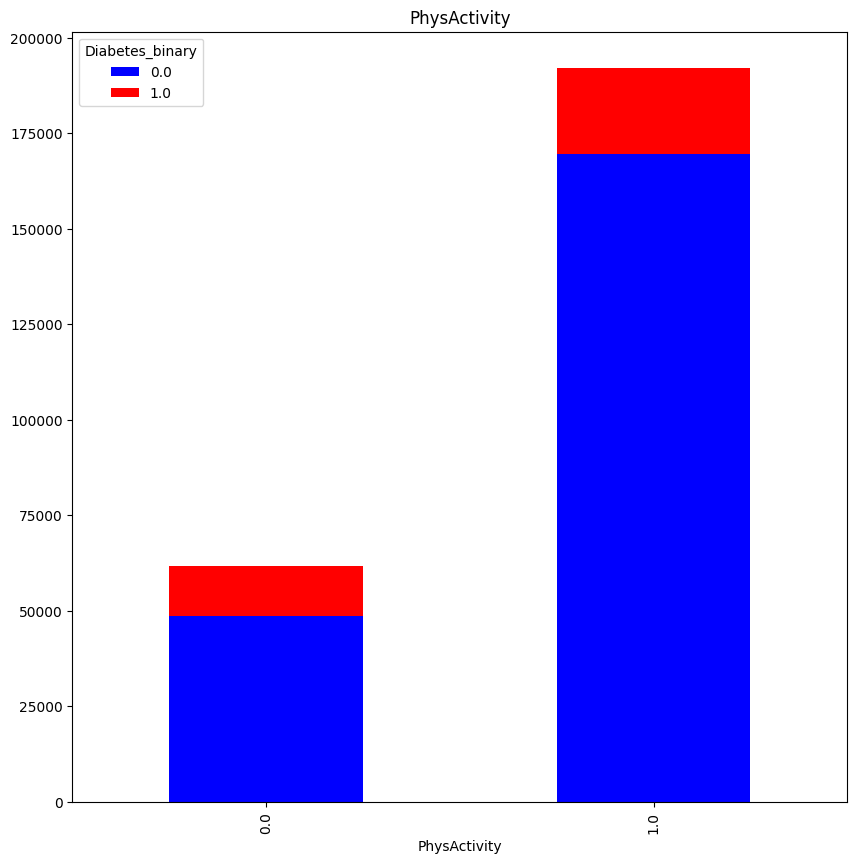

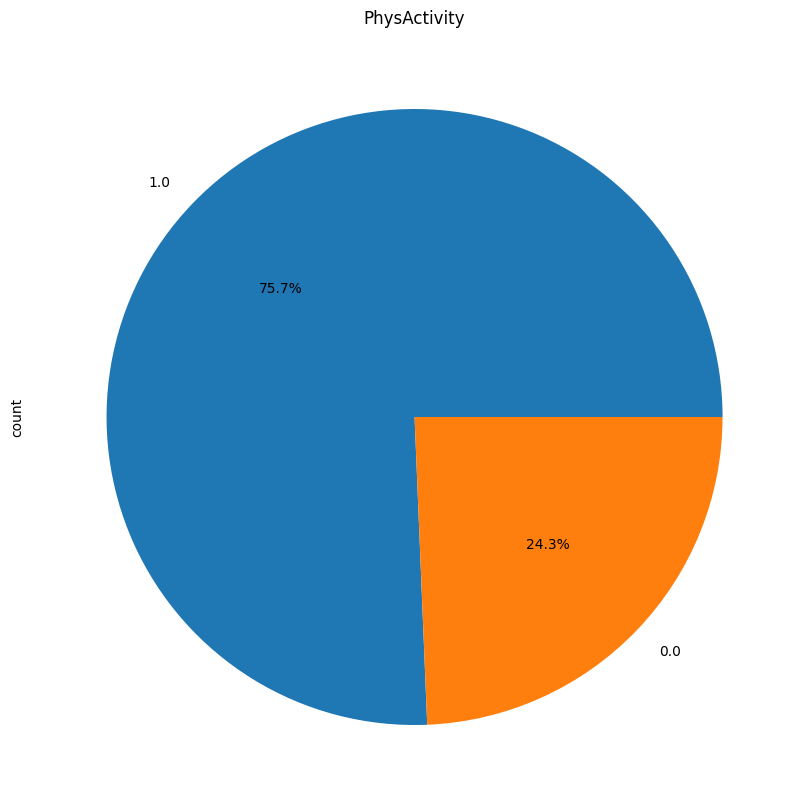

<Figure size 800x800 with 0 Axes>

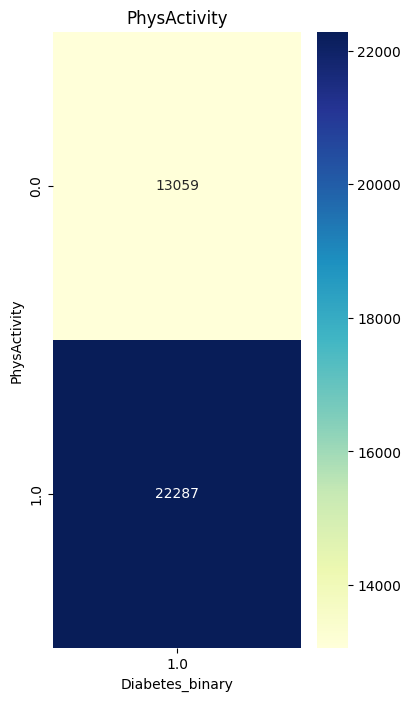

In [307]:
# plot a stacked count plot and a pi chart for PhysActivity
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'PhysActivity' , 'Diabetes_binary', 'PhysActivity')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'PhysActivity', 'PhysActivity')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'PhysActivity', 'Diabetes_binary', 'PhysActivity', 1)

##### Variable 8 - Fruits

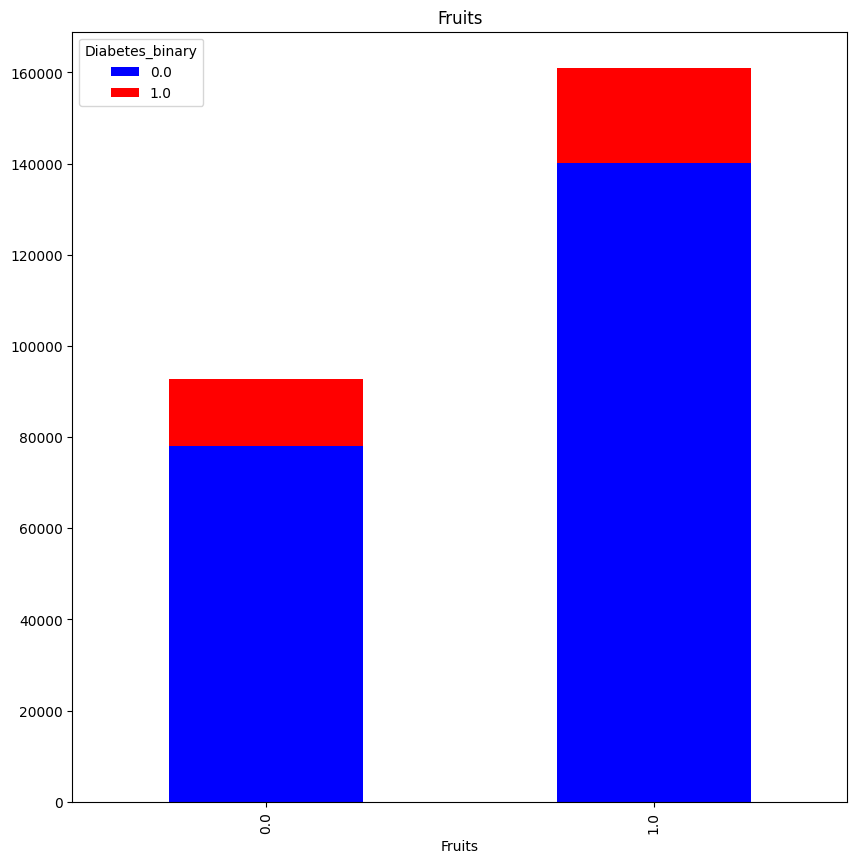

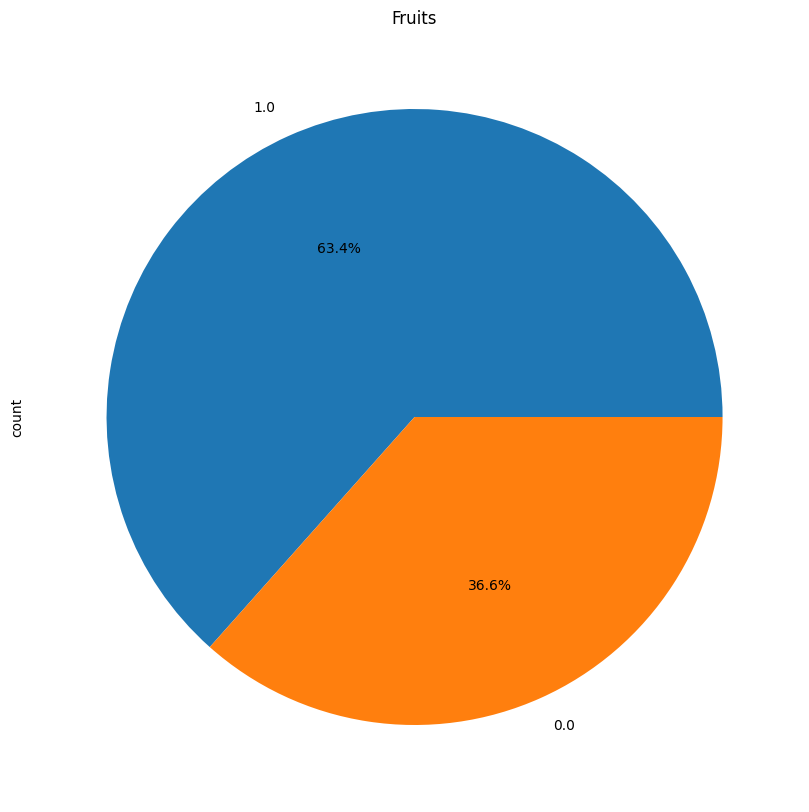

<Figure size 800x800 with 0 Axes>

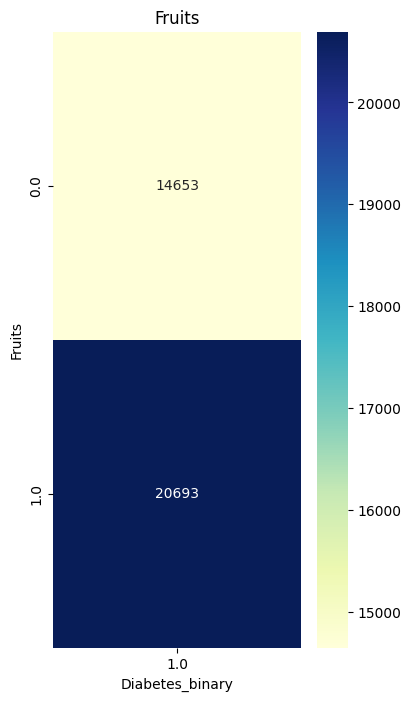

In [308]:
# plot a stacked count plot and a pi chart for Fruits
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Fruits' , 'Diabetes_binary', 'Fruits')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Fruits', 'Fruits')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Fruits', 'Diabetes_binary', 'Fruits', 1)

##### Variable 9 - Veggies

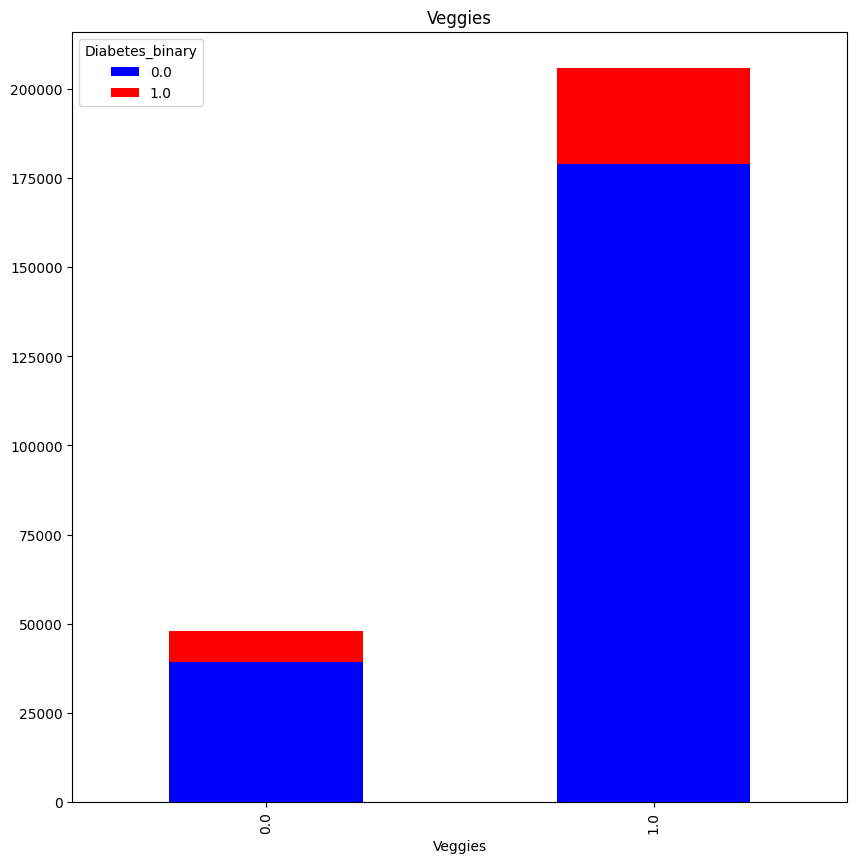

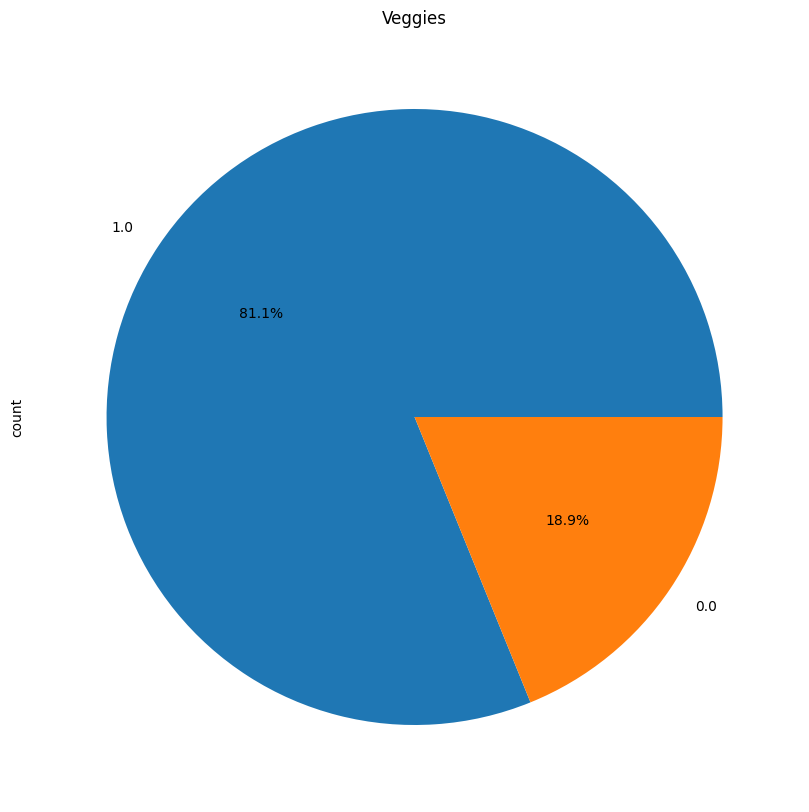

<Figure size 800x800 with 0 Axes>

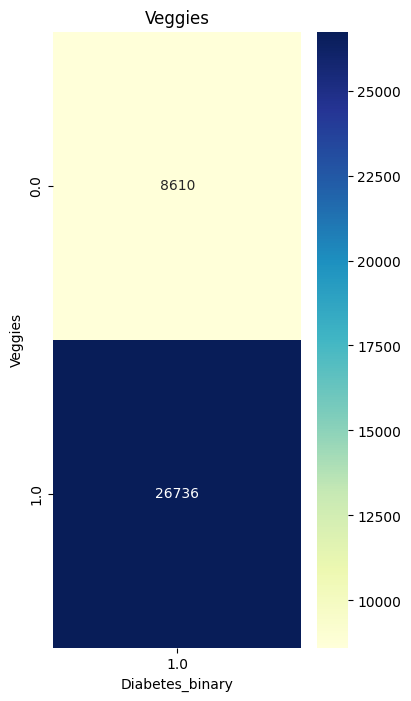

In [309]:
# plot a stacked count plot and a pi chart for Veggies
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Veggies' , 'Diabetes_binary', 'Veggies')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Veggies', 'Veggies')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Veggies', 'Diabetes_binary', 'Veggies', 1)

##### Variable 10 - HvyAlcoholConsump

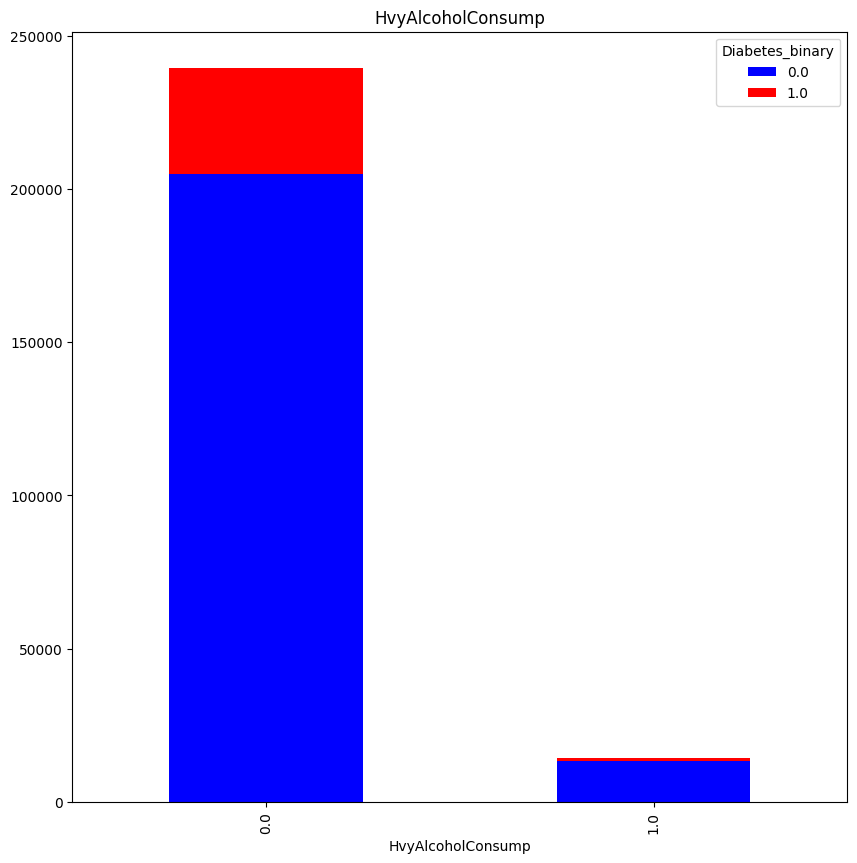

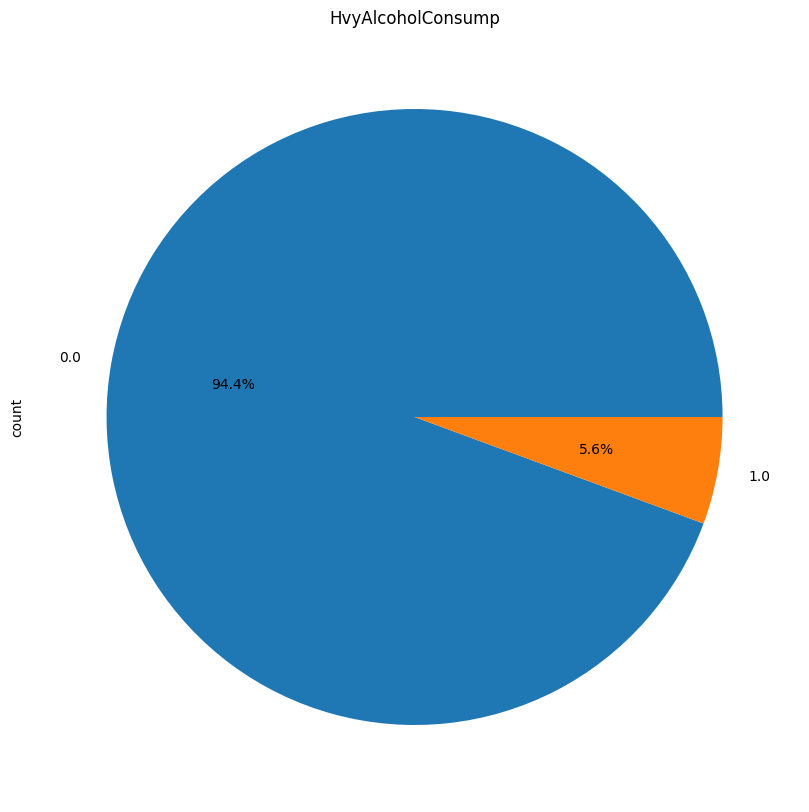

<Figure size 800x800 with 0 Axes>

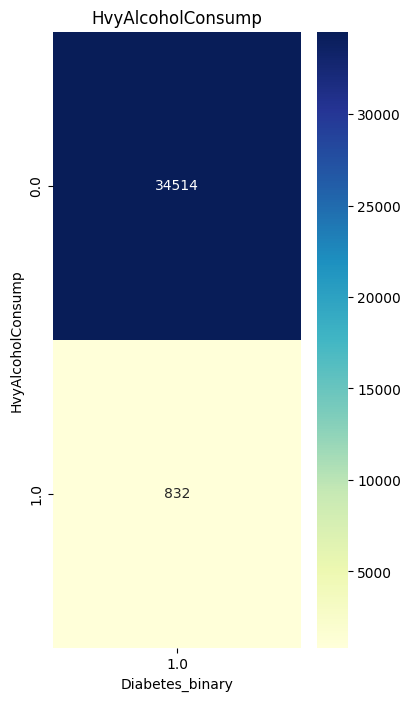

In [310]:
# plot a stacked count plot and a pi chart for HvyAlcoholConsump
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HvyAlcoholConsump' , 'Diabetes_binary', 'HvyAlcoholConsump')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HvyAlcoholConsump', 'HvyAlcoholConsump')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'HvyAlcoholConsump', 'Diabetes_binary', 'HvyAlcoholConsump', 1)

##### Variable 11 - NoDocbcCost

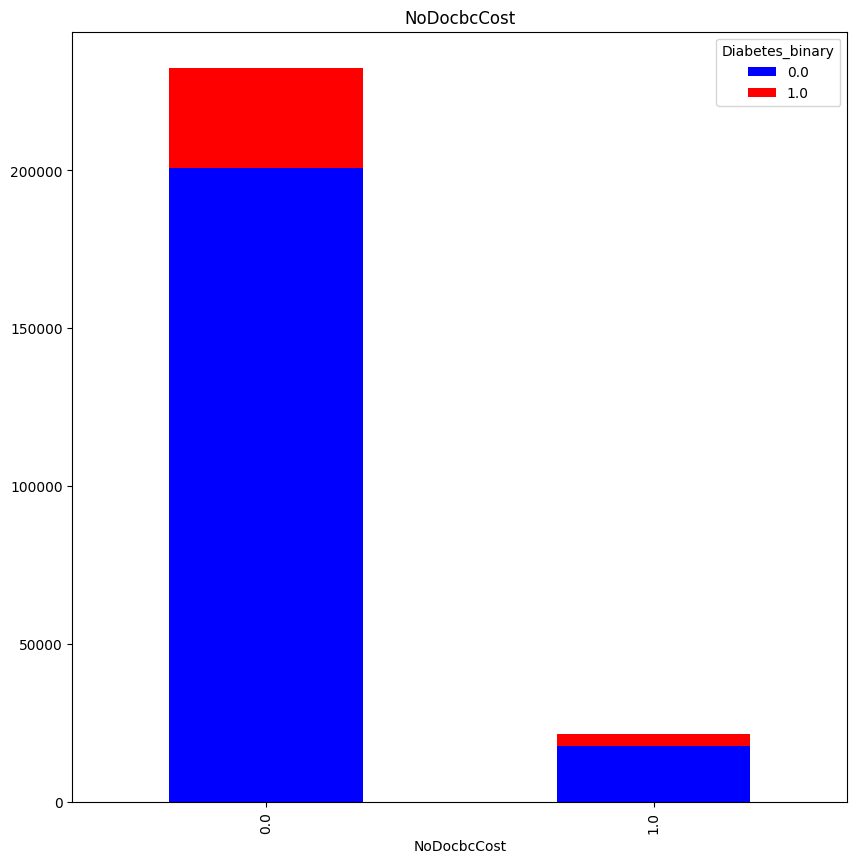

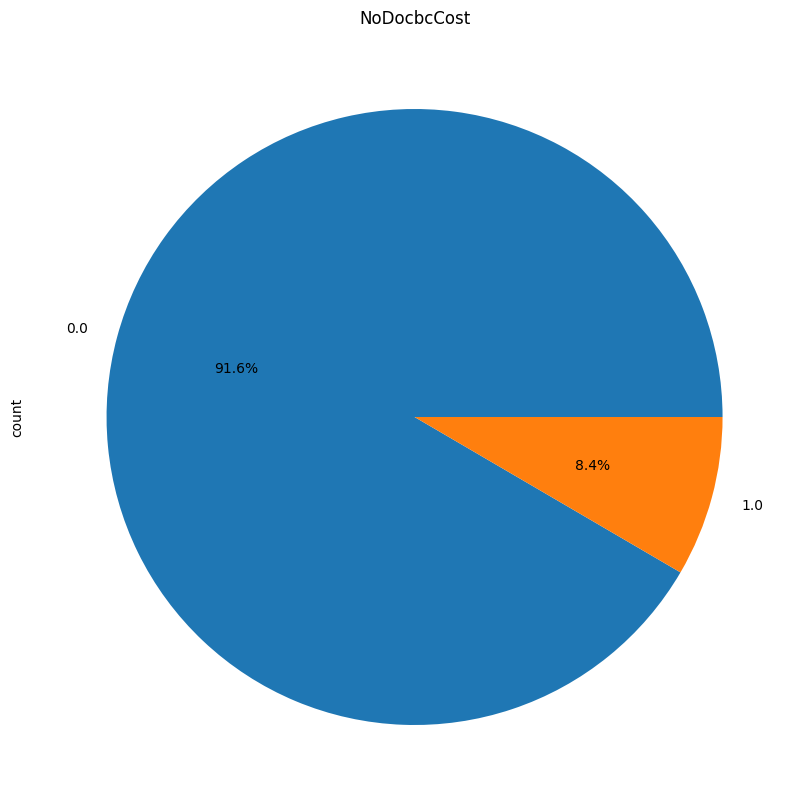

<Figure size 800x800 with 0 Axes>

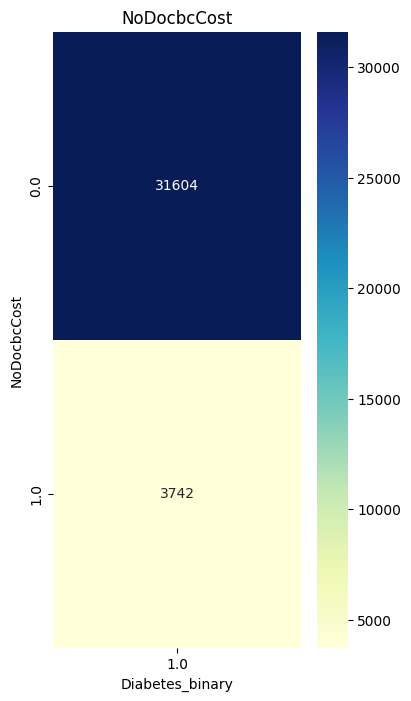

In [311]:
# plot a stacked count plot and a pi chart for NoDocbcCost
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'NoDocbcCost' , 'Diabetes_binary', 'NoDocbcCost')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'NoDocbcCost', 'NoDocbcCost')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'NoDocbcCost', 'Diabetes_binary', 'NoDocbcCost', 1)

##### Variable 12 - DiffWalk

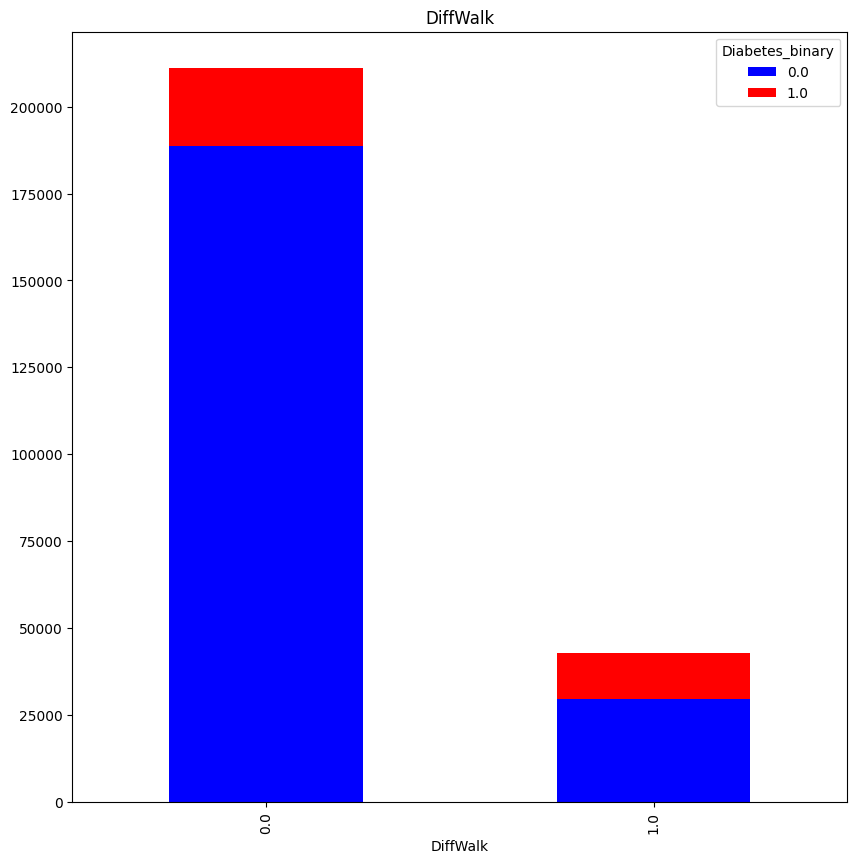

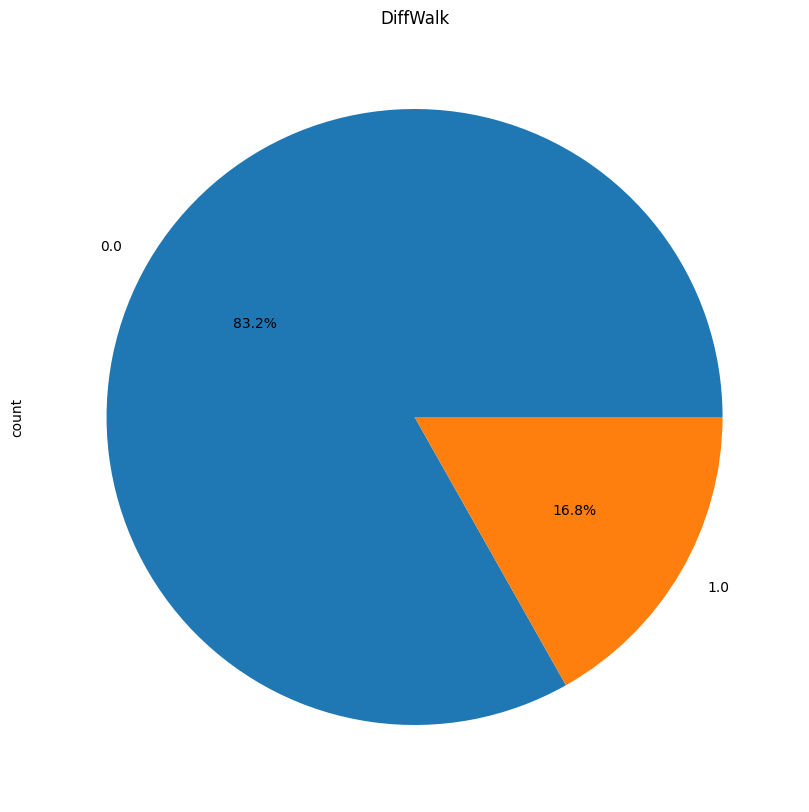

<Figure size 800x800 with 0 Axes>

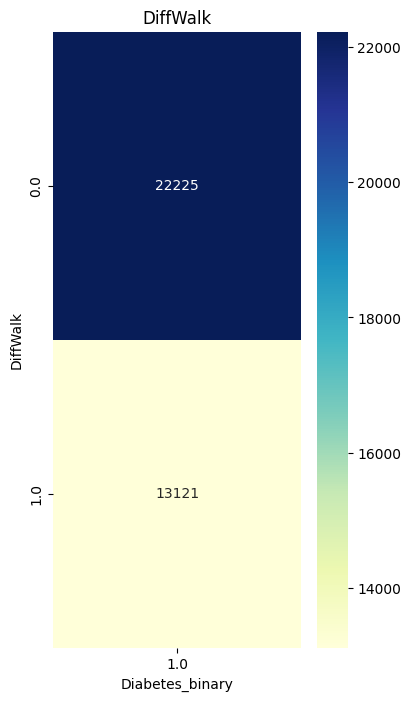

In [312]:
# plot a stacked count plot and a pi chart for DiffWalk
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'DiffWalk' , 'Diabetes_binary', 'DiffWalk')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'DiffWalk', 'DiffWalk')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'DiffWalk', 'Diabetes_binary', 'DiffWalk', 1)

##### Variable 13 - Sex

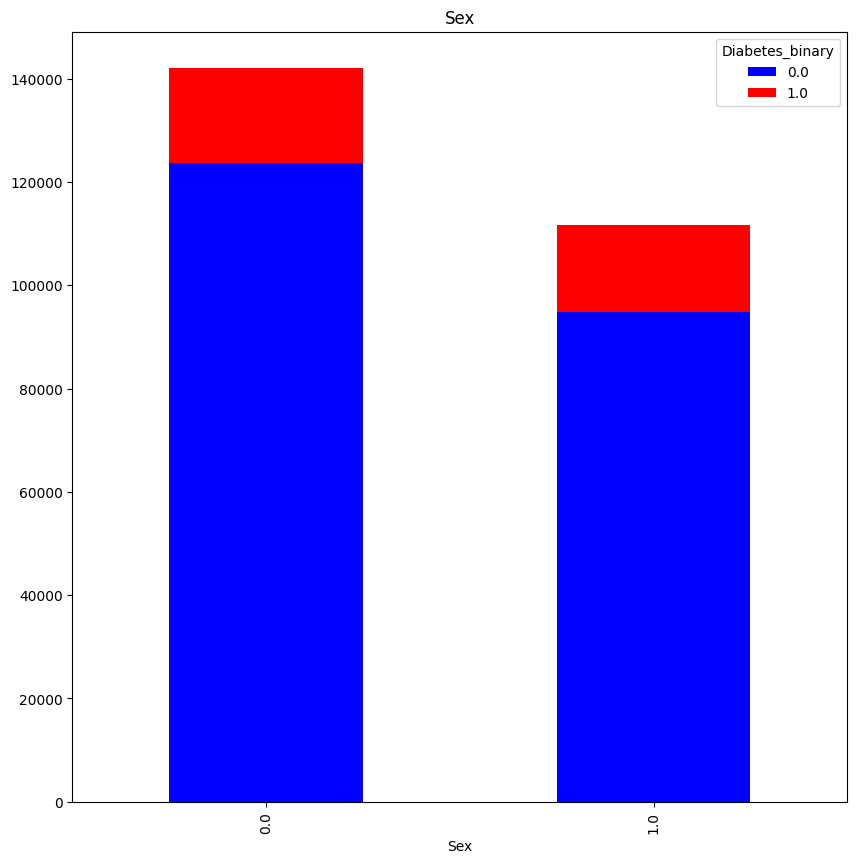

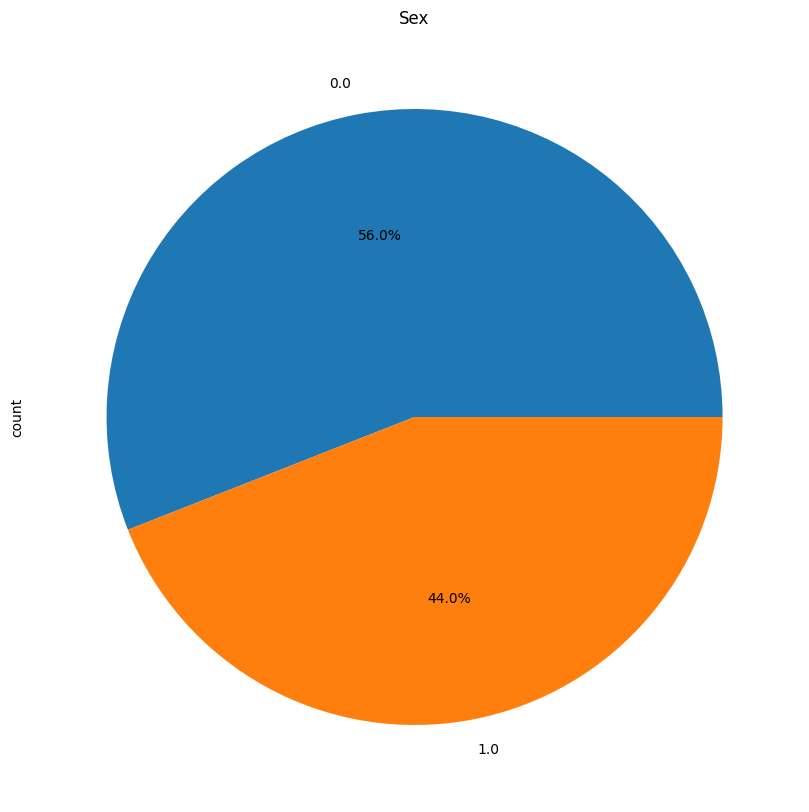

<Figure size 800x800 with 0 Axes>

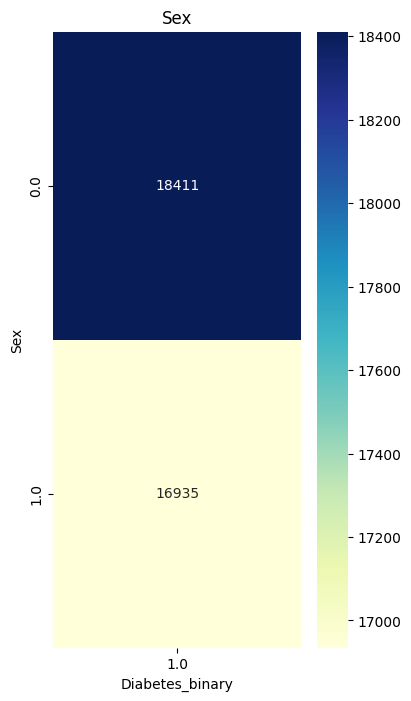

In [313]:
# plot a stacked count plot and a pi chart for Sex
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Sex' , 'Diabetes_binary', 'Sex')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Sex', 'Sex')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Sex', 'Diabetes_binary', 'Sex', 1)

#### Ordinal Categorical Variables

##### HeatMap of Categorical Variables and Binary Target Variable

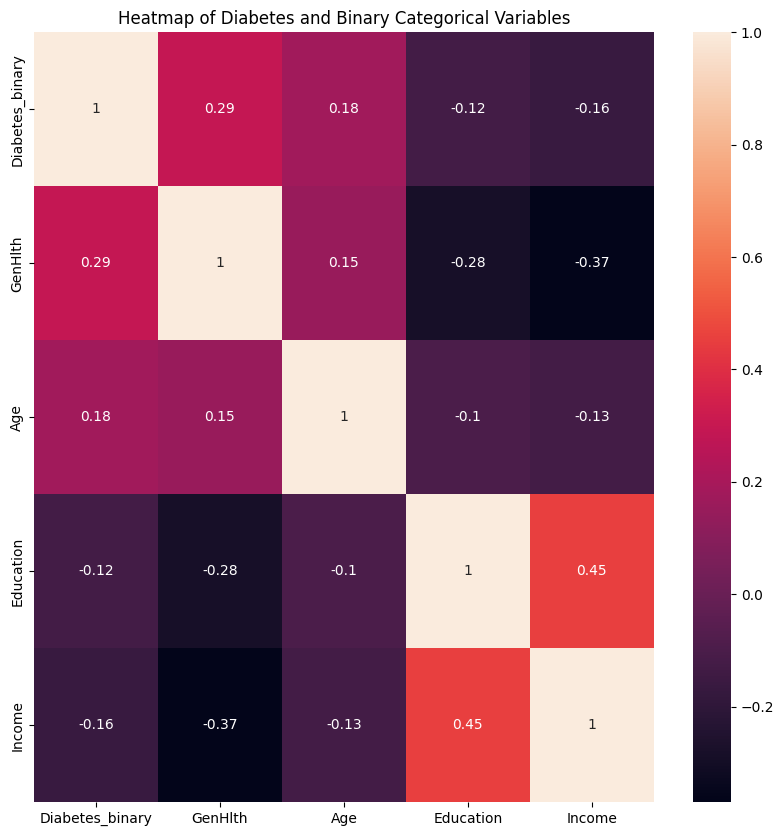

In [314]:
# add diabetic binary into numeric list
ordinal_variables_with_target_variable = ['Diabetes_binary']
for columns in diabetes_health_indicators_data_ordinal_columns:
    ordinal_variables_with_target_variable.append(columns)
    
create_heat_map(diabetes_health_indicators_data_after_feature_selection[ordinal_variables_with_target_variable],
                'Heatmap of Diabetes and Binary Categorical Variables')

##### Variable 14 - Education

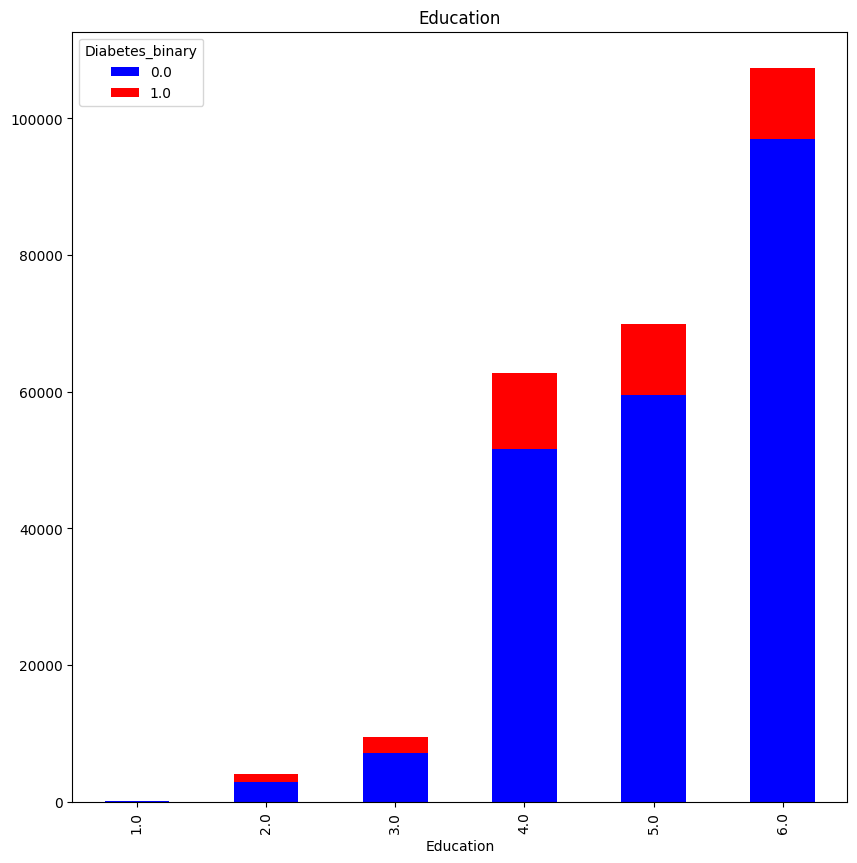

<Figure size 800x800 with 0 Axes>

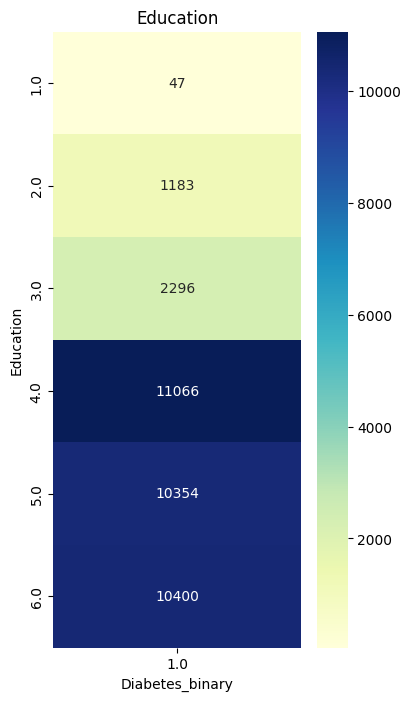

In [315]:
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Education' , 'Diabetes_binary', 'Education')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Education', 'Diabetes_binary', 'Education', 1)

##### Variable 15 - Income

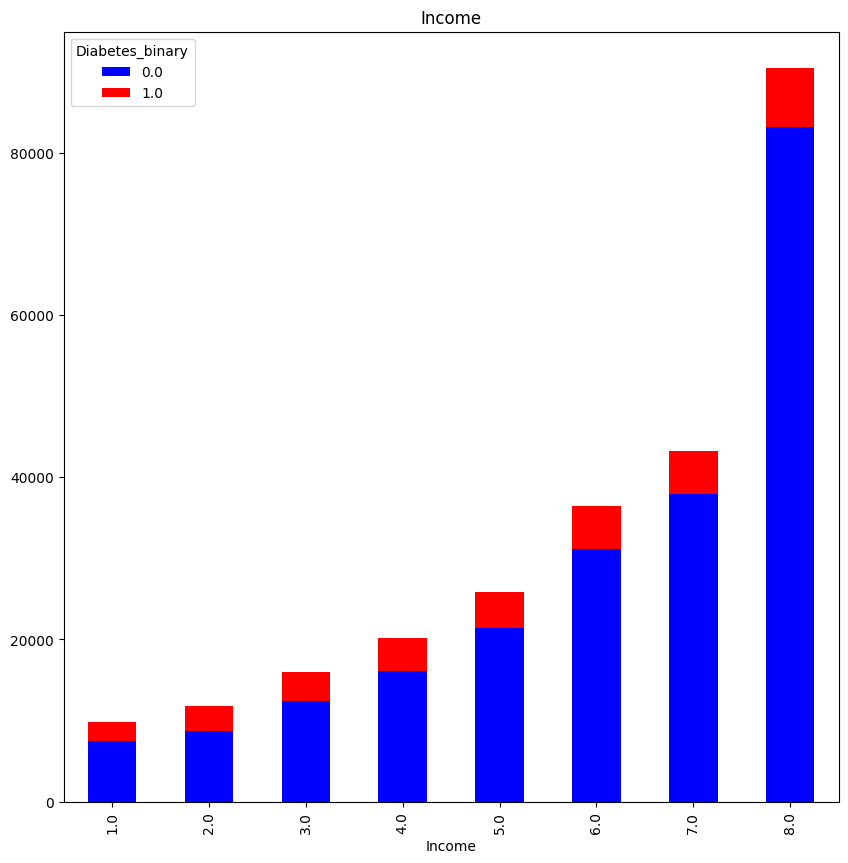

<Figure size 800x800 with 0 Axes>

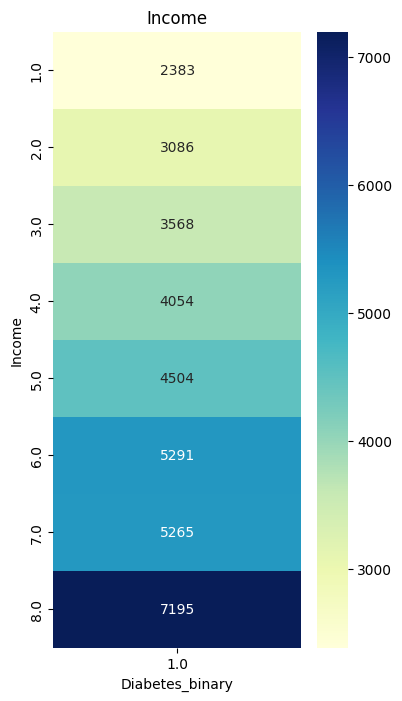

In [316]:
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Income' , 'Diabetes_binary', 'Income')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Income', 'Diabetes_binary', 'Income', 1)

##### Variable 16 - GenHlth

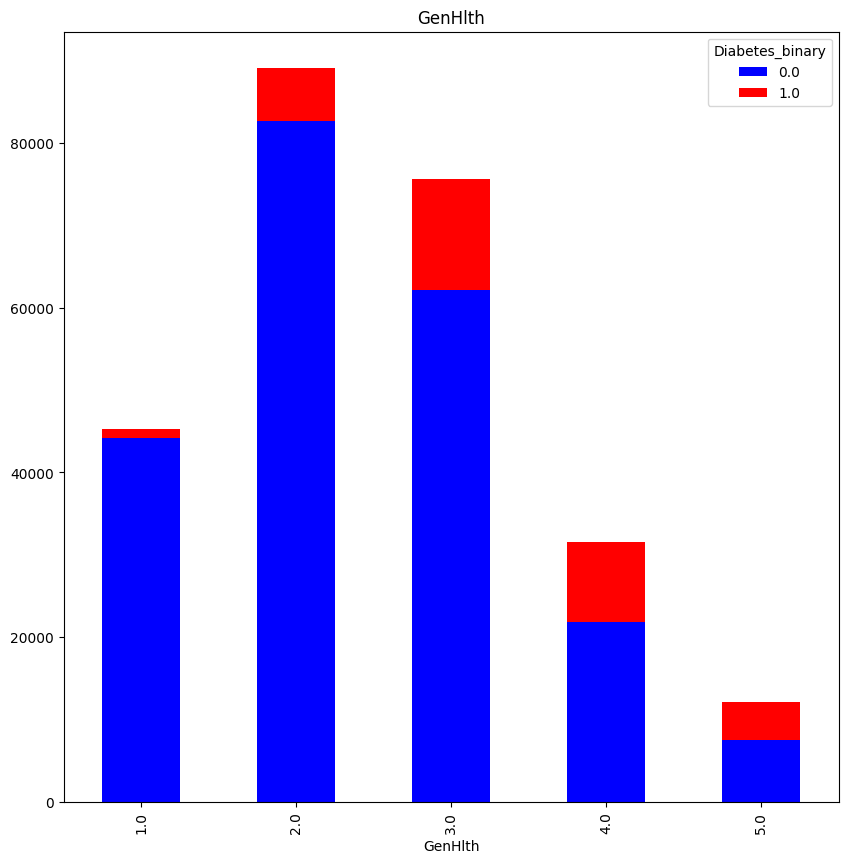

<Figure size 800x800 with 0 Axes>

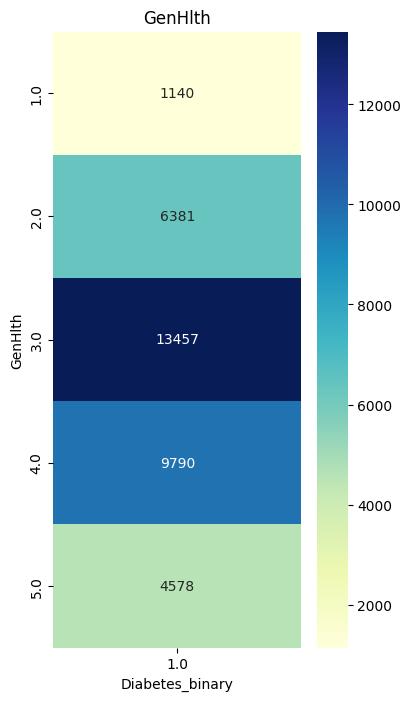

In [317]:
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'GenHlth' , 'Diabetes_binary', 'GenHlth')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'GenHlth', 'Diabetes_binary', 'GenHlth',1)

##### Variable 17 - Age

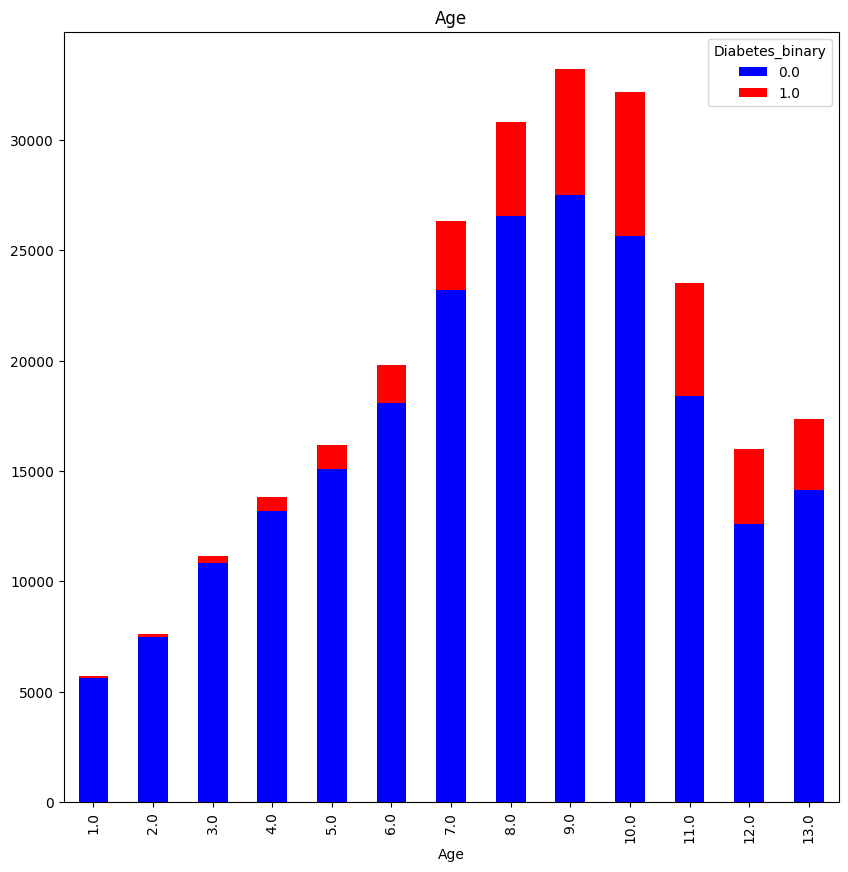

<Figure size 800x800 with 0 Axes>

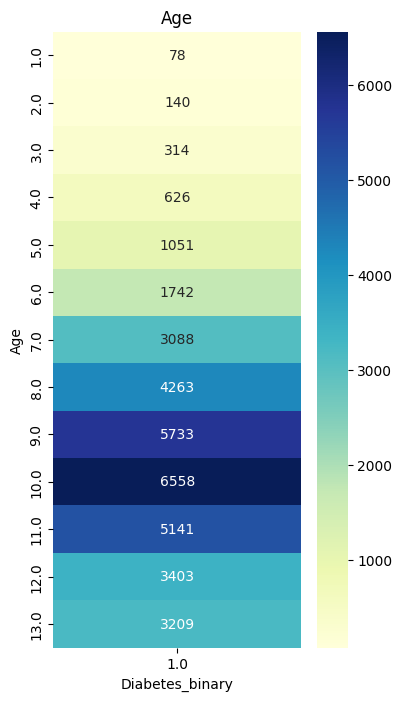

In [318]:
# 1 - 18-24
# 2 - 25-30
# 3 - 31-35
# 4 - 36-40
# 5 - 41-45
# 6 - 46-50
# 7 - 51-55
# 8 - 56-60
# 9 - 61-65
# 10 - 66-70
# 11 - 71-75
# 12 - 76-80
# 13 - 80 or older

create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Age' , 'Diabetes_binary', 'Age')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data_after_feature_selection, 'Age', 'Diabetes_binary', 'Age', 1)

### Numerical Variables

#### HeatMap of Numerical Variables and Target Variable

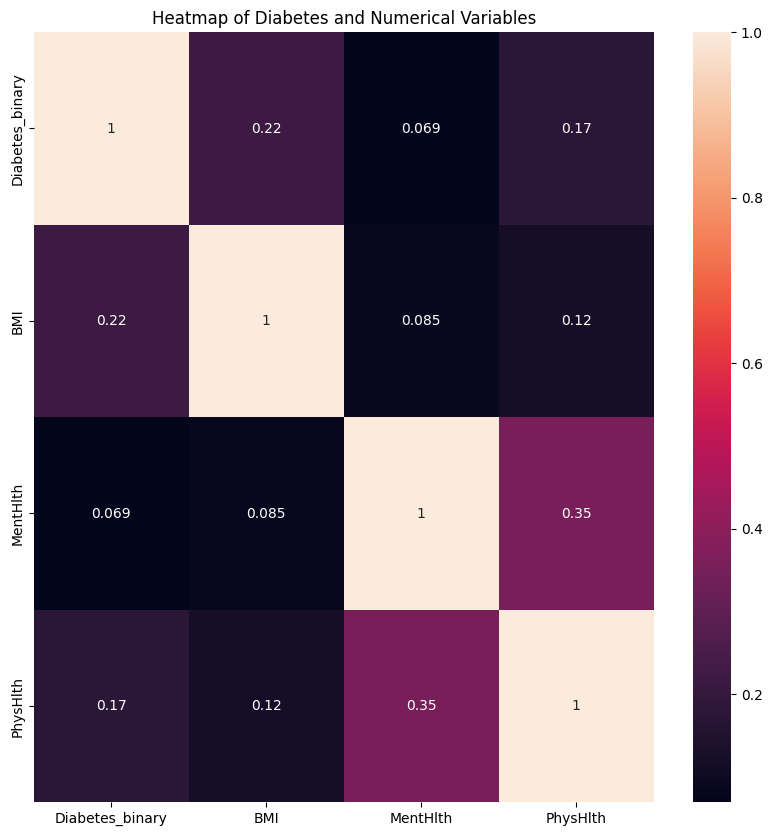

In [319]:
# add diabetic binary into numeric list
numeric_variables_with_target_variable = ['Diabetes_binary']
for columns in diabetes_health_indicators_data_numeric_columns:
    numeric_variables_with_target_variable.append(columns)

create_heat_map(diabetes_health_indicators_data_after_feature_selection[numeric_variables_with_target_variable],
                'Heatmap of Diabetes and Numerical Variables')

#### Variable 18 - BMI

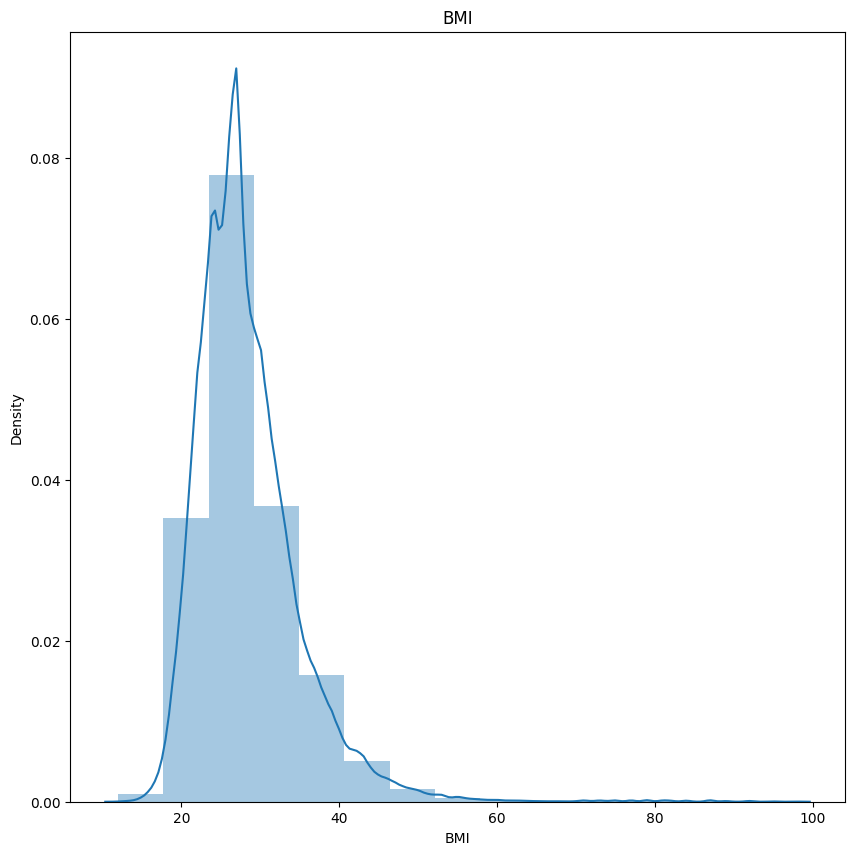

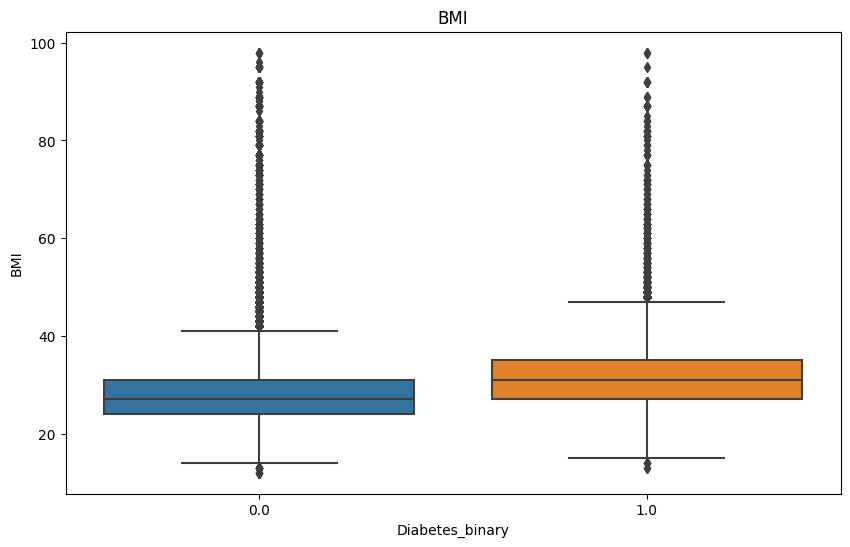

In [320]:
create_histogram(diabetes_health_indicators_data_after_feature_selection, 'BMI', 'BMI',15)
create_box_plot_for_numeric_variables(diabetes_health_indicators_data_after_feature_selection, 'Diabetes_binary', 'BMI', 'BMI')

#### Variable 19 - MentHlth

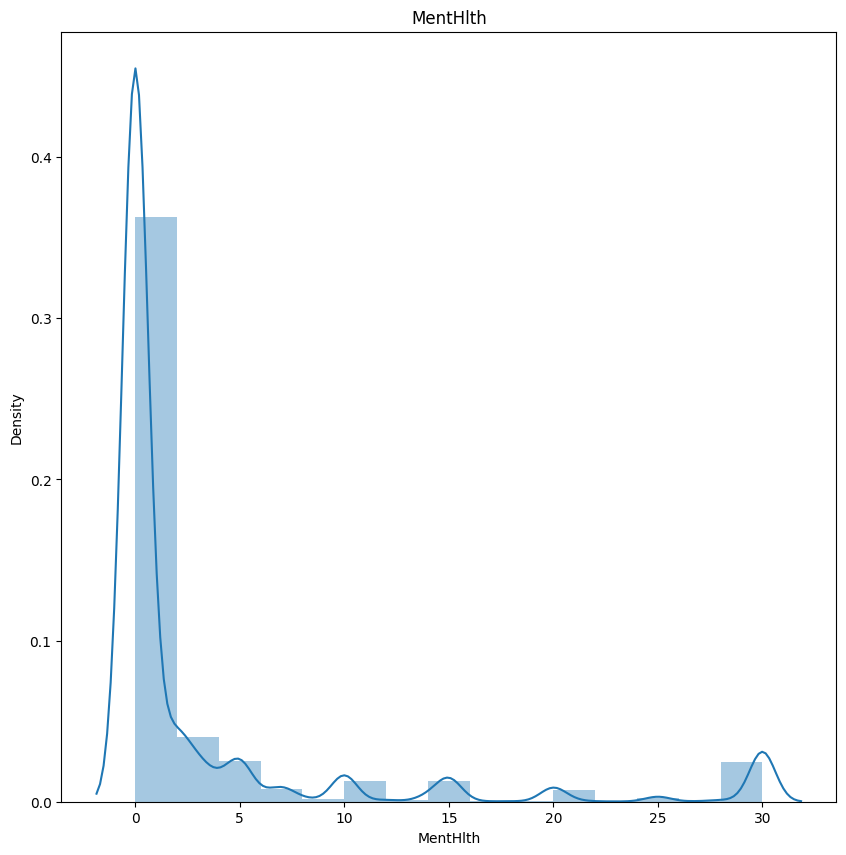

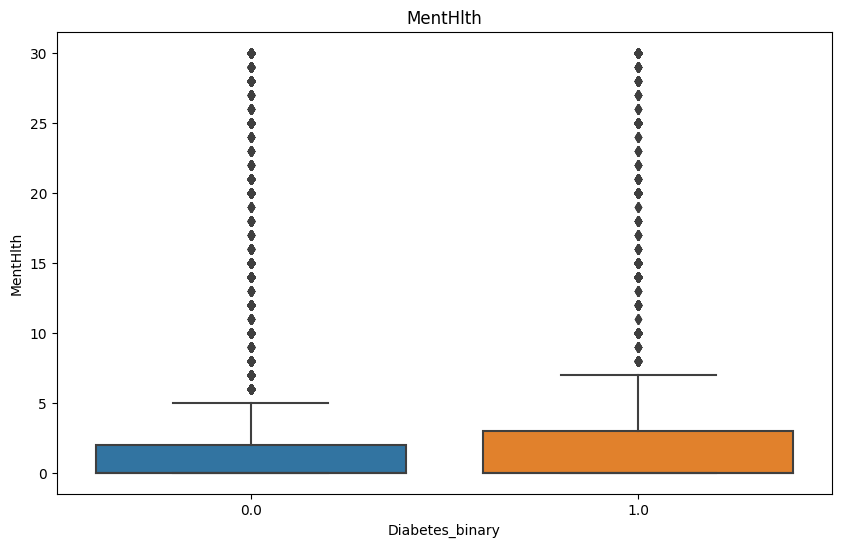

In [321]:
create_histogram(diabetes_health_indicators_data_after_feature_selection, 'MentHlth', 'MentHlth',15)
create_box_plot_for_numeric_variables(diabetes_health_indicators_data_after_feature_selection, 'Diabetes_binary', 'MentHlth', 'MentHlth')

#### Variable 20 - PhysHlth

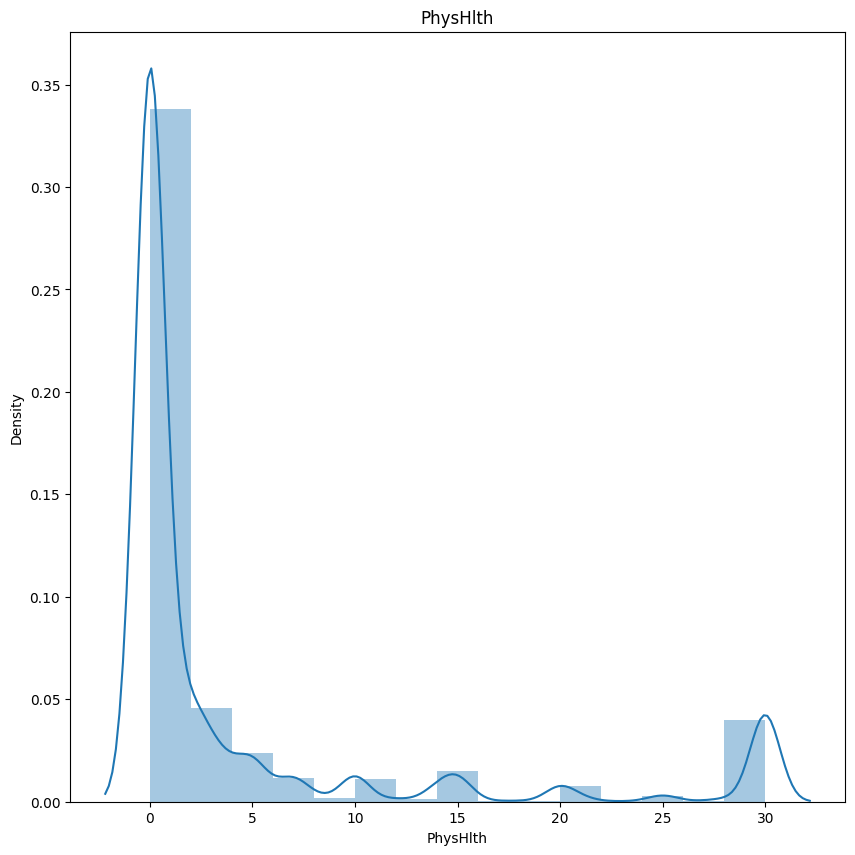

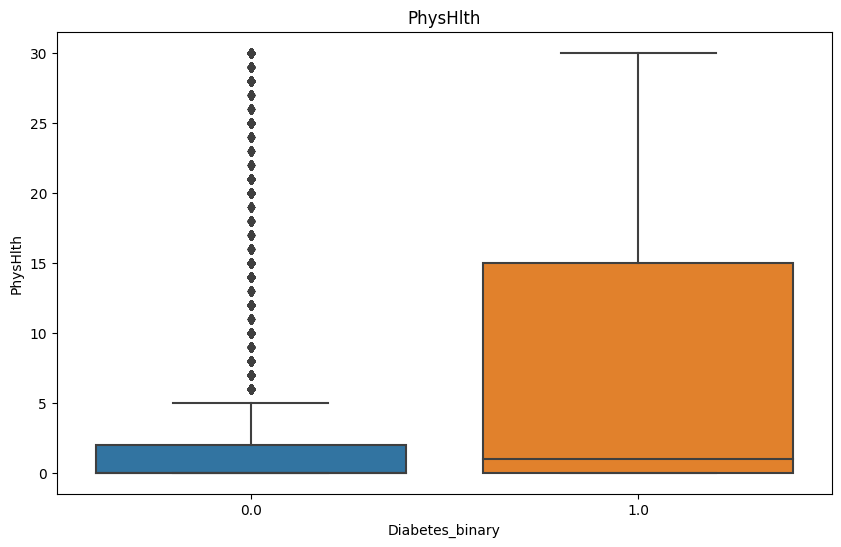

In [322]:
create_histogram(diabetes_health_indicators_data_after_feature_selection, 'PhysHlth', 'PhysHlth',15)
create_box_plot_for_numeric_variables(diabetes_health_indicators_data_after_feature_selection, 'Diabetes_binary', 'PhysHlth', 'PhysHlth')

# Data Preprocessing